# Исследование объявлений о продаже квартир

Посмотрим данные, которые нам предоставили, для их изучения. С помощью метода `info()` выведем информацию о датафрейме.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data_estate = pd.read_csv('dataset_estate.csv', sep='\t')
data_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как видно по информации о датафрейме, в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропуски, так как количество строк в этих столбцах меньше общего количества строк. Больше всего пропусков в столбце `is_apartment`, в описании данных указано, что у этого столбца **булев** тип, здесь мы видим, что у него тип **object**. Природу возникновения пропусков разберем далее в предобработке данных, а пока зафиксируем, что они имеются. Также зафиксируем, что столбцы в датафрейме с разными типами данных, однако преобладает вещественный тип.

С помощью метода `head()` посмотрим первые 30 строк из датафрейма для ознакамления с данными.

In [2]:
data_estate.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу бросается в глаза большое количество значений `NaN` в столбце `is_apartment` и в столбце `parks_nearest`. В столбце `parks_nearest` - расстояние до ближайшего парка, одна из причин значений `NaN` может быть связана с тем, что в населенном пункте, где пропадают недвижимость нет парков. Причина пропусков значений `NaN` в столбце `is_apartment` - флаг о том является ли недвижимость апартаментами, вероятно связана с тем, что для недвижимости, которая не является аппартаментом, решили не указывать этот флаг, а просто пропустили его.

Построим гистограммы для числовых значений из датафрейма для просмотра распределения данных.

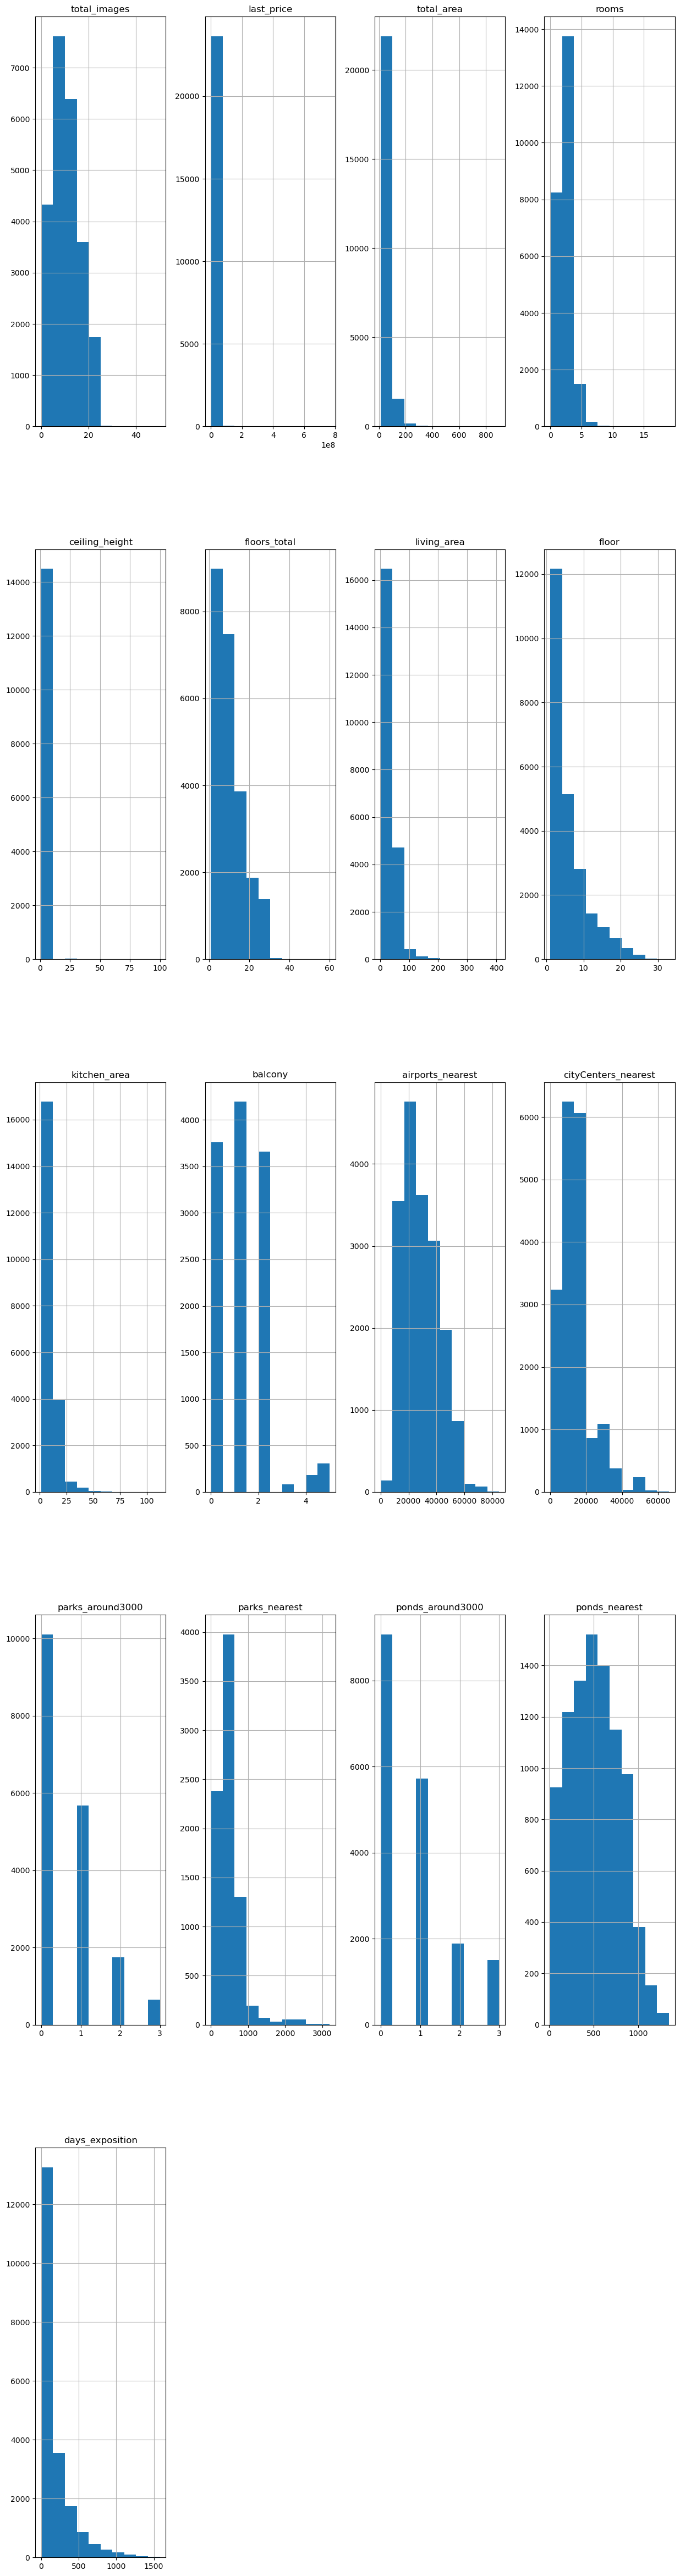

In [3]:
data_estate.hist(figsize=(15, 60))
pass

В большинстве случаев данные на графиках не вызывают подозрений. Однако на двух графиках есть странные значения по следующим столбцам:
1. `ceiling_height` (высота потолков), если судить по графику, то у нас в данных есть недвижимость с высотой потолков 25 метров и выше, что не реально;
2. `days_exposistion` (сколько дней было размещено объявление), по графику видно, что больше 12000 объектов недвижимости продали где-то за полгода, это выглядит подозрительно.

### Предобработка данных

Посчитаем количество пропусков в каждом столбце и отсортируем их по убыванию.

In [4]:
data_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Сразу удалим строки, где есть пропуски в столбцах `floors_total` - всего этажей в доме и `locality_name` - название населённого пункта, так как заполнить в пропуски в этих столбцах мы никак не сможем, вряд ли у нас получится определить населенный пункт по другим столбцам. Тоже самое касается `floors_total`, вот если бы в данных было название улицы с номером дома где продают недвижимость, то по этим данным можно было бы найти объявление о продаже недвижиомтси в этом же доме и взять оттуда количество этажей, если оно там не пропущено.

In [5]:
data_estate = data_estate.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

Как можно заметить в большинстве столбцов есть пропуски в данных, давайте узнаем их причину и обработаем их. Начнем со столбца в котором больше всего пропусков `is_apartment` - апартаменты (булев тип). Для начала посмотрим какие в этом столбце есть уникальные значения, а также сколько строк разным значением в столбце `is_apartment`.

In [6]:
print(data_estate['is_apartment'].unique())
print(data_estate.groupby('is_apartment')['is_apartment'].count())

[nan False True]
is_apartment
False    2710
True       50
Name: is_apartment, dtype: int64


Всего в 50 строках во всем датафрейме отмечен флаг о том, что это апартаменты, в остальных строках либо пропуск, либо флаг не отмечен. Наше изначальное предположение о том, что для недвижимости, которая не является апартаментами, решили не заполнять флаг об апартаментах оказалось верным, заполним пропуски в столбце значением **False**.

In [7]:
data_estate['is_apartment'] = data_estate['is_apartment'].fillna(False)

Перейдем к столбцу `balcony` — число балконов, посмотрим первые 20 строк в этом столбце.

In [8]:
data_estate.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


По данным заметно, что количество балконов, либо нуль, либо пропущено, заполненим пропуски в столбце `balcony` значением нуль, так как логично предположить, что там где пропущено количество балконов, вероятно их просто нет.

In [9]:
data_estate['balcony'] = data_estate['balcony'].fillna(0)

Посмотрим какие значения есть в столбце `ceiling_height`— высота потолков.

In [10]:
data_estate.sort_values(by='ceiling_height')['ceiling_height'].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Помимо пропусков у нас есть еще аномальные значения, вряд ли есть низкие потолки с высотой 1 метр или слишком высокие потолки c высотой больше 20 метров, вероятно там где указали высоту потолков от 20 метров, забыли поставить в нужном месте запятую. Высокие потолки в доме, так же увеличивают стоимость его постройки и стоимость отопления, засчет увеличения высоты потолка увеличивается и площадь самого помещения и маловероятно большинство людей будут так вкладываться в недвижимость ради того чтобы сделать потолки по выше.

Давайте посмотрим сколько у нас всего недвижимости с аномальной высотой потолков - меньше 2 метров и больше 5 метров.

In [11]:
data_estate.loc[(data_estate['ceiling_height'] > 5) | (data_estate['ceiling_height'] < 2)].groupby(
    'ceiling_height')['ceiling_height'].count().sort_values(ascending=False)

ceiling_height
27.00     8
25.00     7
8.00      3
32.00     2
5.30      2
1.00      1
14.00     1
27.50     1
26.00     1
24.00     1
22.60     1
20.00     1
10.30     1
1.20      1
8.30      1
6.00      1
5.80      1
5.60      1
5.50      1
5.20      1
1.75      1
100.00    1
Name: ceiling_height, dtype: int64

По полученным данным видно, у нас не так много недвижимости с аномальной высотой потолков, суммарно выходит 39 объявлений. Для объявлений где высота потолков от 20 до 40 метров разделим высоту на 10, так как, как ранее было описано, здесь заметно, что запятую в числах указали не в том месте. Оставшиеся объявления с аномальные значения удалим из данных, так как они не соответствуют реальности.

In [12]:
data_estate.loc[(data_estate['ceiling_height'] >= 20) & (data_estate['ceiling_height'] <= 40), 'ceiling_height'] = \
data_estate.loc[(data_estate['ceiling_height'] >= 20) & (data_estate['ceiling_height'] <= 40), 'ceiling_height'] / 10

data_estate = data_estate.loc[((data_estate['ceiling_height'] >= 2) & (data_estate['ceiling_height'] <= 5)) 
                              | (data_estate['ceiling_height'].isna())]

Осталось чуть больше 9 тысяч пропусков в столбце `ceiling_height` - высота потолков, это много, чтобы заполнить пропуски медианным значениям, получится выброс в данных. Так как любая недвижимость представляет собой геометрическую фигуру прямоугольного параллелепипеда, можно рассчитать высоту потолка используя формулы для этой фигуры, например, для того получить высоту в прямоугольной параллелепипеде, необходимо объем разделить на площадь, только к сожалению объема помещения у нас в данных нет, так что такой расчет нам не подходит. Есть формулы для расчета минимальной и максимальной возможной высоты потолка, но там необходимо знать длины сторон помещения, чего у нас тоже нет в данных и этот вариант также нам не подходит. Есть еще третий вариант для расчета высоты потолка, это рассчитать его относительно высоты окна, но и таких данных у нас нет. Так как мы не можем рассчитать корректные высот потолков по предоставленным данным и заполнить ими пропущенные значения, то оставим эти пропуски как есть, чтобы не портить данные.

Далее заполним пропуски в столбцах `kitchen_area` — площадь кухни в квадратных метрах и `living_area` — жилая площадь в квадратных метрах. Сначала заполним пропуски в столбце `living_area` медианным значением в зависимости от количества комнат, так как жилая площадь напрямую зависит от количества комнат, чем больше в квартире комнат, тем больше у неё жилая площадь.

In [13]:
for r in data_estate['rooms'].unique():
    data_estate.loc[(data_estate['rooms'] == r) & (data_estate['living_area'].isna()), 'living_area'] = \
    data_estate.loc[(data_estate['rooms'] == r), 'living_area'].median()

Теперь посмотрим есть ли у нас квартиры у которых сумма жилой площади и площади кухни превышает общую площадь.

In [14]:
data_estate.loc[data_estate['total_area'] < (data_estate['living_area'] + data_estate['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
542,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,...,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
548,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
598,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
692,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21700,20,2450000.0,44.00,2019-02-12T00:00:00,2,2.70,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21744,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,False,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21790,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,False,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21831,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,False,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


По данным видно, что такие квартиры есть, но такие квартиры невозможно построить, так как таких данных у нас немного - всего 73 строки, можем их удалить, ибо они не соответствуют действительности.

In [15]:
data_estate = data_estate.loc[(data_estate['total_area'] > (data_estate['living_area'] + data_estate['kitchen_area']))
                             | (data_estate['kitchen_area'].isna()) | (data_estate['living_area'].isna())]

Теперь посмотрим сколько у нас строк с пропущенным значений в столбце `kitchen_area` в квартирах-студиях, может площадь кухни пропустили только для таких квартир.

In [16]:
data_estate.loc[(data_estate['kitchen_area'].isna()) & (data_estate['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
438,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
605,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,18.00,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
693,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
712,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,False,...,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22747,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,...,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23079,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23422,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,18.00,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Таких квартир всего 145, заполним у них пропуски в столбце `kitchen_area` значением нуль, так как в квартирах-студиях нельзя отделить жилую площадь и площадь кухни.

In [17]:
data_estate.loc[(data_estate['kitchen_area'].isna()) & (data_estate['studio'] == True)]['kitchen_area'] = \
data_estate.loc[(data_estate['kitchen_area'].isna()) & (data_estate['studio'] == True)]['kitchen_area'].fillna(0)

Посмотрим остались ли у нас еще квартиры где указано нуль комнат и они не являются квартирами-студиями.

In [18]:
data_estate.loc[(data_estate['rooms'] == 0) & (data_estate['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
347,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
505,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
776,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,18.0,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
835,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
942,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1569,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,False,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1620,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,False,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2523,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,False,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3006,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,False,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4097,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,False,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


По данным видно, что в большинстве строк, жилая площадь не сильно меньше общей плоащади, что характерно для квартир-студий, однако есть и объявления, где жилая площадь меньше общей площади примерно в два раза, это уже будет характерно для однокомнатной квартиры. Определить точную причину появления таких данных мы не можем, у нас всего 59 строк, лучше удалим эти сторки, так как они выбиваются из общих значений.

In [19]:
data_estate = data_estate.loc[((data_estate['rooms'] != 0) & (data_estate['studio'] == False)) | 
                              ((data_estate['rooms'] == 0) & (data_estate['studio'] == True))]

Заполним пропуски в столбце `kitchen_area` медианным значением в зависимости от количества комнат, так как, чем больше в квартире комнат, тем больше у неё общая площадь, соотвественно и больше будет площадь кухни.

In [20]:
for r in data_estate['rooms'].unique():
    data_estate.loc[(data_estate['rooms'] == r) & (data_estate['kitchen_area'].isna()), 'kitchen_area'] = \
    data_estate.loc[(data_estate['rooms'] == r), 'kitchen_area'].median()

Обработаем пропуски в столбце `days_exposition` — сколько дней было размещено объявление (от публикации до снятия). Для начала посмотрим распределение пропусков в этом столбце по годам. Для этого сначала получим год публикации объявления из столбца `first_day_exposition` — дата публикации, запишем его в отдельный столбец — `year_publication`.

In [21]:
data_estate['year_publication'] = pd.to_datetime(data_estate['first_day_exposition'], format='%Y-%m-%d %H:%M:%S').dt.year

Остортируем данные по дате публикации, чтобы узнать с какого месяца и года у нас начинаются объявления и каким месяцом и годом они заканчиваются:

In [22]:
data_estate.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_publication
614,1,12036000.0,100.00,2014-11-27T00:00:00,3,NaN,16.0,52.00,3,False,...,1.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,606.0,2014
20520,10,4600000.0,44.00,2014-11-27T00:00:00,1,NaN,22.0,20.00,19,False,...,1.0,Санкт-Петербург,15268.0,13377.0,0.0,NaN,1.0,636.0,1002.0,2014
3277,8,8200000.0,52.50,2014-11-27T00:00:00,1,NaN,8.0,21.50,2,False,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,2014
15341,2,3550000.0,34.00,2014-11-27T00:00:00,1,2.55,9.0,18.90,7,False,...,1.0,Санкт-Петербург,13430.0,14405.0,1.0,500.0,1.0,504.0,1149.0,2014
6992,1,21453004.0,156.40,2014-11-27T00:00:00,4,NaN,13.0,63.60,13,False,...,0.0,Санкт-Петербург,29990.0,4870.0,1.0,641.0,1.0,145.0,1214.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17452,7,3200000.0,45.60,2019-05-03T00:00:00,2,NaN,5.0,30.90,5,False,...,1.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
12139,7,9000000.0,60.30,2019-05-03T00:00:00,2,3.25,5.0,36.90,4,False,...,4.0,Санкт-Петербург,32302.0,4662.0,1.0,398.0,0.0,NaN,NaN,2019
14165,14,6200000.0,86.20,2019-05-03T00:00:00,3,NaN,10.0,49.50,7,False,...,0.0,деревня Куттузи,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
8129,4,3280000.0,38.19,2019-05-03T00:00:00,1,NaN,6.0,14.41,4,False,...,0.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


Судя по данным первые объявления были опубликованы в конце 2014, а последние заканчиваются 2019 года, почти серединой года. Теперь посмотрим сколько было опубликано объявлений в разные года.

In [23]:
data_estate.groupby('year_publication')['year_publication'].count()

year_publication
2014     133
2015    1158
2016    2717
2017    8066
2018    8411
2019    2851
Name: year_publication, dtype: int64

Меньше всего объявления было опубликовано в 2014 году, это связано с тем, что в данных нам дается по сути всего один месяц из этого года. В 2015 и 2016 годах не заметно сильного роста по публикации объявлений о продаже квартиры относительно 2017 и 2018 годов, по сравнению с 2016 годом, в этих годах количество объвлений можно сказать, что увеличлось втрое. В 2019 году снова произошел спад по количеству объявлений о продаже квартир, но это связано с тем в данных у нас неполный 2019 год по количеству объявлений, последние объявления в данных датируются началом мая месяца.

Теперь посмотрим количество объявлений по году, где пропущено значения в столбце `days_exposition`, посмотри сколько квартир не удалось продать до мая 2019 года в зависимости от года публикации.

In [24]:
data_estate.loc[data_estate['days_exposition'].isna()].groupby('year_publication')['year_publication'].count()

year_publication
2014      18
2015      70
2016      67
2017     270
2018     952
2019    1774
Name: year_publication, dtype: int64

И посмотрим ещё сколько у нас пропусков в процентах в каждом году, то есть какой процент квартир до сих пор не продали с каждого года.

In [25]:
((
    data_estate.loc[data_estate['days_exposition'].isna()].groupby(
        'year_publication')['year_publication'].count() / data_estate.groupby(
        'year_publication')['year_publication'].count()
) * 100).astype('int')

year_publication
2014    13
2015     6
2016     2
2017     3
2018    11
2019    62
Name: year_publication, dtype: int32

Нам известно, что данные об объявлениях начинаются с конца ноября 14 года и заканчиваются маем 2019 года, можно сказать, что нам предоставлены данные за 4,5 года. 

Пропуски в столбце `days_exposition` в 2019 году понятны, не очень много квартир можно продать менее чем за полгода, да и не стоит забывать, что объявление могли разместить в мае месяце, а предоставленные объявления у нас заканчиваются датой 3 мая 2019 года, тогда в таком случае, пропуск в данном столбце будет выглядеть логично, так невозможно продать квартиру за несколько дней, тут наоборот вызовет подозрения, если будет указано значение в столбце `days_exposition`, так как такая продажа будет выглядеть слишком быстрой. 

В данных есть квартиры, которые продаются с 2014, больше 4-х лет, таких квартир 13% от тех квартир, которые были опубликованы в 2014 году, это выглядит подозрительно, с такими квартирами либо что-то не так и после проверки документов их отказываются брать, либо они не востребована на рынке недвижимости, например они могут быть слишком старыми и со старым ремонтом или вообще без ремонта, либо у таких квартир не обосновано завышена цена.

По остальным годам также есть квартиры, которые не продали до мая 2019 года, однако там их не такой большой процент, в целом можно сделать вывод, что пропуски в данном столбце выглядит логично, какие-то объявления слишком поздно опубликовали и их еще не успели продать, об этом говорит 61% пропусков в столбце `days_exposition` в 2019 году, по остальных годам видимо в продаже осталась не обоснова дорогая недвижимость, либо не обоснова дешевая, что может вызвать подозрение о том, что это мошенники. 

На основании вышеизложенного, логичнее будет оставить пропуски в столбце `days_exposition` как есть, так как пропуски в этом столбце в некоторых случаях выглядят логично, а также они могут помочь выявить подозрительные объявления.

Далее посмотрим данные в столбцах `airports_nearest` — расстояние до аэропорта, `parks_nearest` — расстояние до ближайшего парка и `ponds_nearest` — расстояние до ближайшего водоёма, `cityCenters_nearest` — расстояние до центра города. Посмотрим первые 50 строк.

In [26]:
data_estate.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_publication
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,45.00,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2017


По данным заметно, что есть объявления о продаже квартиры, где во всех 4 столбцах пропущены значения. Можно сказать, что данные в этих столбцах являются географическими и определяются случайным образом, поэтому заполнить пропуски медианным значением мы не можем, потому что величины в этих столбцах распределяются без зависимости в других столбцах и нам не к чему привязаться, чтобы заполнить пропуски медианным значением в этих столбцах.

Также заметно, что пропуски в столбцах `parks_nearest` и `ponds_nearest`, указаны там, где в столбцах `parks_around3000` — число парков в радиусе 3 км и `ponds_around3000` — число водоёмов в радиусе 3 км указано значение нуль.

Оставим пропуски в этих столбцах как есть, так как логичную замену предложить мы не можем.

Посчитаем сколько у нас теперь осталось пропусков в столбцах. 

In [27]:
data_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8975
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              134
balcony                     0
locality_name               0
airports_nearest         5437
cityCenters_nearest      5414
parks_around3000         5413
parks_nearest           15370
ponds_around3000         5413
ponds_nearest           14370
days_exposition          3151
year_publication            0
dtype: int64

В большинстве столбцов мы смогли полностью избавиться от пропусков, где-то мы осознанно оставили пропуски, чтобы не испортить данные, где-то удалить строки с аномальными значениями.

Снова выведем информацию об всем датафрейме, чтобы посмотреть типы столбцов.

In [28]:
data_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23336 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23336 non-null  int64  
 1   last_price            23336 non-null  float64
 2   total_area            23336 non-null  float64
 3   first_day_exposition  23336 non-null  object 
 4   rooms                 23336 non-null  int64  
 5   ceiling_height        14361 non-null  float64
 6   floors_total          23336 non-null  float64
 7   living_area           23336 non-null  float64
 8   floor                 23336 non-null  int64  
 9   is_apartment          23336 non-null  bool   
 10  studio                23336 non-null  bool   
 11  open_plan             23336 non-null  bool   
 12  kitchen_area          23202 non-null  float64
 13  balcony               23336 non-null  float64
 14  locality_name         23336 non-null  object 
 15  airports_nearest   

Заменим тип данных на **bool** в столбце `is_apartment` — апартаменты, так как это флаг, который обозначает является ли недвижимость апартаментами или нет и это логическое значение.

In [29]:
data_estate['is_apartment'] = data_estate['is_apartment'].astype('bool')

Посмотрим первые 5 значений из столбца `first_day_exposition` — дата публикации.

In [30]:
data_estate['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

В столбце отображаются даты, а тип у столбца **object** преобразуем тип данных в **datetime** с помощью функции *to_datetime()*.

In [31]:
data_estate['first_day_exposition'] = pd.to_datetime(data_estate['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

В столбцах `balcony` — число балконов и `floors_total` — всего этажей в доме имеют тип данных **float**, преобразуем тип в данных в **int**, так как эти столбцы описывают значения, которые не могут быть дробными.

In [32]:
data_estate['balcony'] = data_estate['balcony'].astype('int')
data_estate['floors_total'] = data_estate['floors_total'].astype('int')

Преобразуем также тип данных у столбца `last_price` — цена на момент снятия с публикации, из типа данных **float** в тип данных **int**, так как у в подавлющем большинстве цена за квартиру указывается в целых числах.

In [33]:
data_estate['last_price'] = data_estate['last_price'].astype('int')

Также преобразуем тип данных из **float** в **int** у столбцев:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м)

Для столцев, где указывает число предметов, логичнее сделать целочисленный тип, так как такие значения не могут быть дробными. В столбцах где указано расстояние, преборазовываем значения в целочисленный тип, так как, во-первых мало кто убращает внимание на числа после запятой, когда хочет узнать расстояние от центра до квартиры, во-вторых, по посмотренным данным при проверке и заполнении пропущенных значений в этих столбцах заметно, что в основном указывается число нуль после запятой.

In [34]:
data_estate['airports_nearest'] = data_estate['airports_nearest'].convert_dtypes()
data_estate['cityCenters_nearest'] = data_estate['cityCenters_nearest'].convert_dtypes()
data_estate['parks_around3000'] = data_estate['parks_around3000'].convert_dtypes()
data_estate['parks_nearest'] = data_estate['parks_nearest'].convert_dtypes()
data_estate['ponds_around3000'] = data_estate['ponds_around3000'].convert_dtypes()
data_estate['ponds_nearest'] = data_estate['ponds_nearest'].convert_dtypes()

Посмотрим уникальные значения в столбце `locality_name`, чтобы проверить нет ли там дублирующихся значений.

In [35]:
data_estate.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Как видно по данным, есть дублирующиеся значения, например, "посёлок Аннино" и "поселок Аннино", заменим везде в названии населенного пункта слово "посёлок" на "поселок". Сделаем также замену слова "поселок городского типа" на слово "поселок", так как эти слова обозначают одно значение, аналогично поступим и со значением "городской поселок" заменим его на слово "поселок".

In [36]:
data_estate['locality_name'] = data_estate['locality_name'].str.replace('посёлок', 'поселок')
data_estate['locality_name'] = data_estate['locality_name'].str.replace('поселок городского типа', 'поселок')
data_estate['locality_name'] = data_estate['locality_name'].str.replace('городской поселок', 'поселок')

Теперь посмотрим, есть ли у нас в данных явные дубликаты.

In [37]:
data_estate.duplicated().sum()

0

Дубликатов у нас нет, здорово, значит мы сделаем правильное преобразование названий населенных пунктов.

Рассчитаем следующие данные и добавим их в соотствующие столбцы:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Чтобы посчитать цену однно квадратного метра разделим стоимость недвижимости на общую площадь. Столбец `last_price` — цена на момент снятия с публикации и `total_area` — общая площадь квартиры в квадратных метрах

In [38]:
data_estate['square_meter_price'] = data_estate['last_price'] / data_estate['total_area']

Для того чтобы заполнить день недели публикации воспользуем свойством **weekday** у столбца `first_day_exposition` — дата публикации. Для заполнения месяца и года, воспользуемся свойствами **month** и **year** и соотственно.

In [39]:
data_estate['weekday_exposition'] = data_estate['first_day_exposition'].dt.weekday
data_estate['month_exposition'] = data_estate['first_day_exposition'].dt.month
data_estate['year_exposition'] = data_estate['first_day_exposition'].dt.year

Для заполнения данных по типу этажа воспользуемся столбцами `floor` — этаж и `floors_total` — всего этажей в доме, если значения в столбце `floor` равно значению в столбце `floors_total`, то это "последний" этаж, если равно 1, то "первый" этаж, если оба эти условия не выполняются значит этаж "другой". Напишем для этого отдельную функцию и вызовем потом для неё метод apply.

In [40]:
def get_floor_type(floor, floors_total):
    try:
        if floor == floors_total:
            return 'последний'
        elif floor == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        pass

In [41]:
data_estate['floor_type'] = data_estate[['floor', 'floors_total']].apply(lambda x: get_floor_type(*x), axis=1)

Переведем расстояние до центра города из метров в километры и запишим его в отдельный столбец.

In [42]:
data_estate['cityCenters_nearest_kilometer'] = (data_estate['cityCenters_nearest'] / 1000).round(0)

In [43]:
data_estate.loc[~(data_estate['cityCenters_nearest'].isna())].sort_values(by='last_price').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,year_publication,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometer
8750,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,...,0,<NA>,8.0,2019,111.834862,2,3,2019,последний,9.0
19533,5,1190000,14.00,2018-07-29,1,NaN,5,11.00,1,False,...,0,<NA>,4.0,2018,85000.000000,6,7,2018,первый,11.0
4227,8,1200000,49.10,2018-10-21,4,2.50,5,36.90,1,False,...,0,<NA>,44.0,2018,24439.918534,6,10,2018,первый,12.0
8712,1,1350000,18.80,2017-11-22,0,2.75,19,15.80,1,False,...,1,1127,128.0,2017,71808.510638,2,11,2017,первый,14.0
13985,8,1400000,24.00,2017-05-24,0,NaN,25,14.00,1,False,...,0,<NA>,60.0,2017,58333.333333,2,5,2017,первый,21.0
17859,3,1400000,13.00,2017-12-03,1,2.60,9,17.60,1,False,...,1,185,410.0,2017,107692.307692,6,12,2017,первый,16.0
712,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,0,<NA>,40.0,2017,88235.294118,2,6,2017,первый,30.0
16852,9,1550000,15.00,2018-08-21,1,2.70,9,17.60,1,False,...,1,1079,42.0,2018,103333.333333,1,8,2018,первый,16.0
23262,10,1600000,92.00,2018-07-10,3,3.00,6,13.00,1,False,...,3,167,3.0,2018,17391.304348,1,7,2018,первый,4.0
20012,7,1650000,32.20,2017-05-22,1,2.60,9,17.80,8,False,...,2,433,58.0,2017,51242.236025,0,5,2017,другой,50.0


Изучим данные по следующим параметрам:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим для каждого параметра отдельную гистограмму.

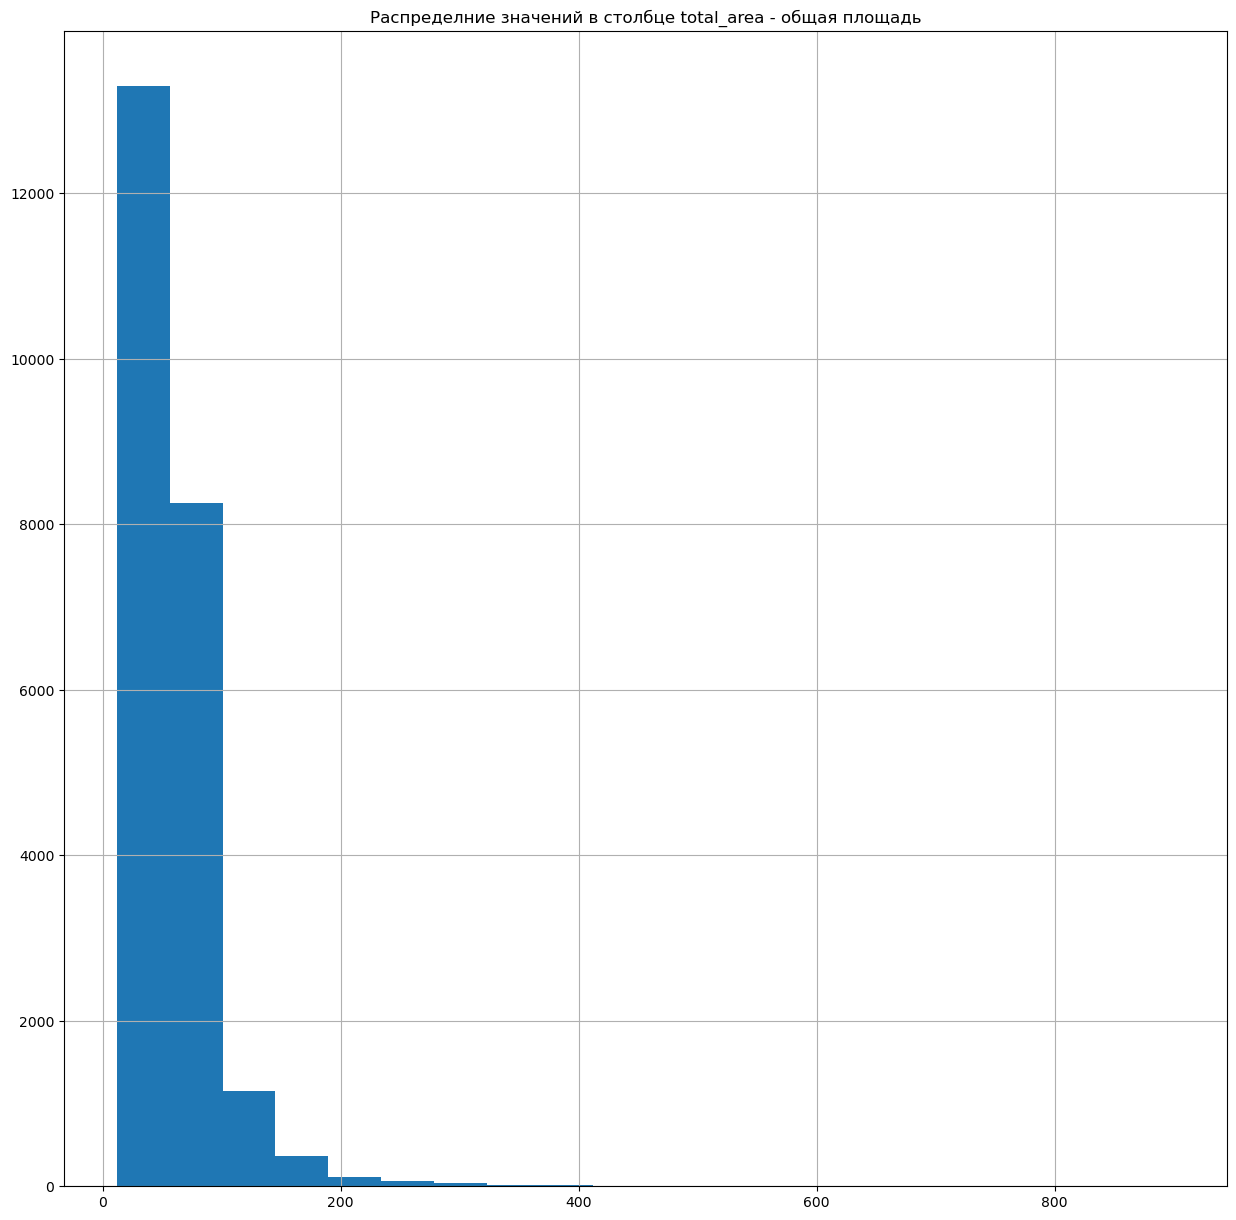

In [44]:
data_estate['total_area'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце total_area - общая площадь')
pass

Как видно по графику большинство недвижимости имеет площадь до 100 квадратных метров, затем идет постепенный спад до 200 метров, после 200 метров, тоже встречаются значения, но они достаточно редкие, возможно это какие коммерческие помещения или особняки.

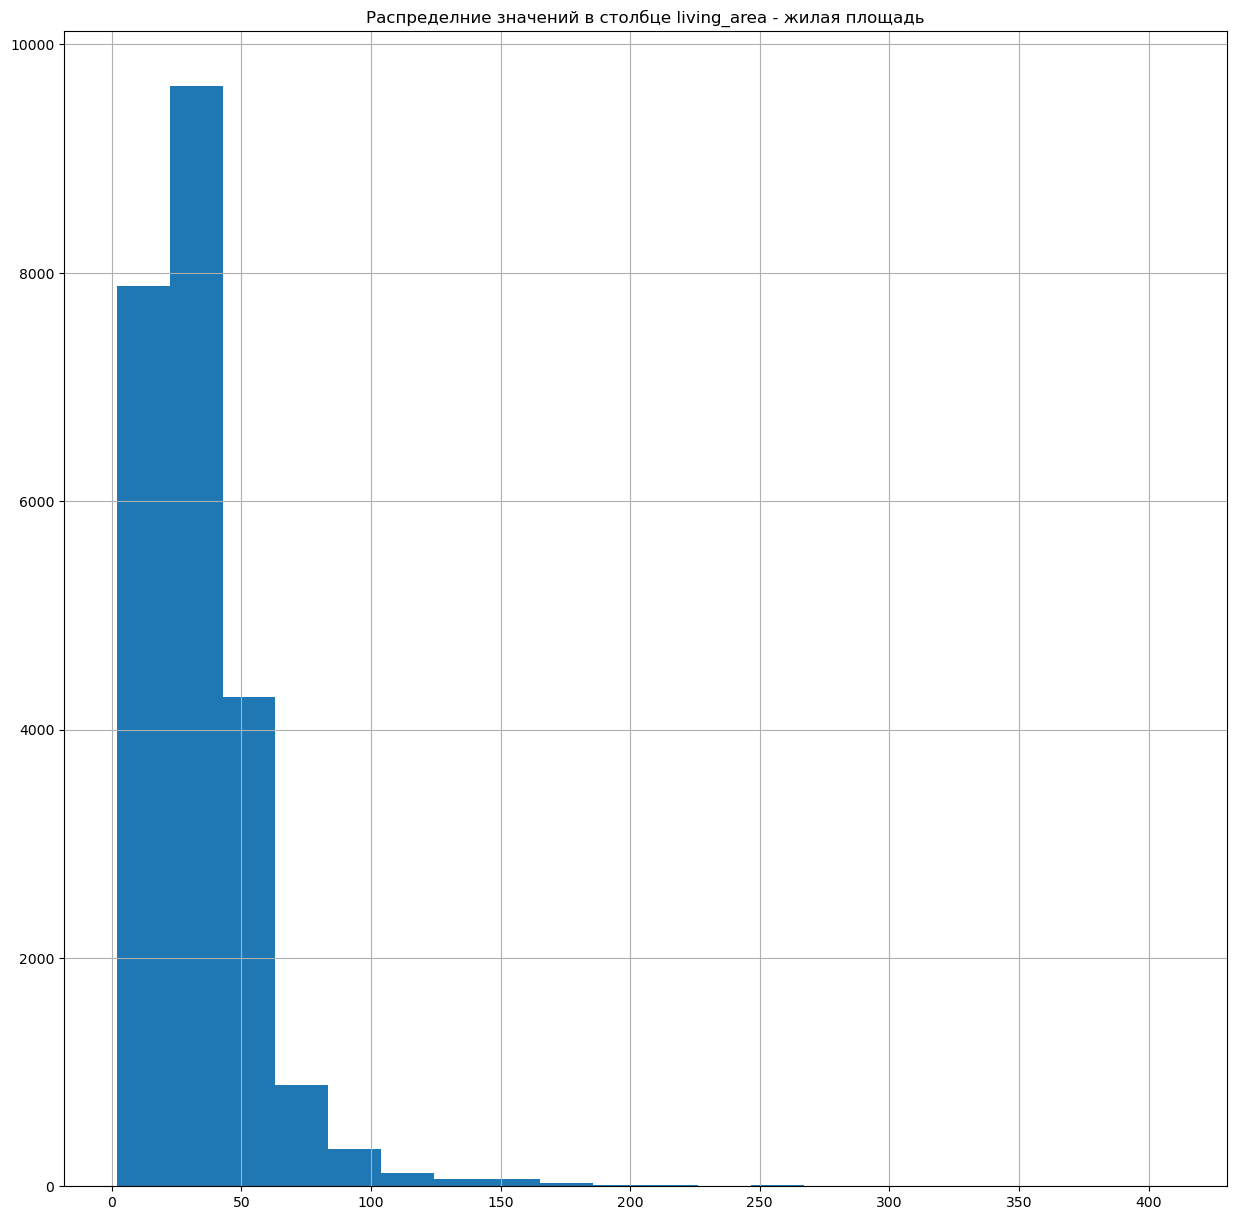

In [45]:
data_estate['living_area'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце living_area - жилая площадь')
pass

По графику видно, что большиство недвидимости имеет жилую площадь до 50 метров, затем идет спад в диапозоне от 50 до 100 метров, недвидимость с жилой площадь больше 100 метров имеет наименьшее количество, так как скорее всего эта недвижимость каких-либо состоятельных людей, которых обычно немного.

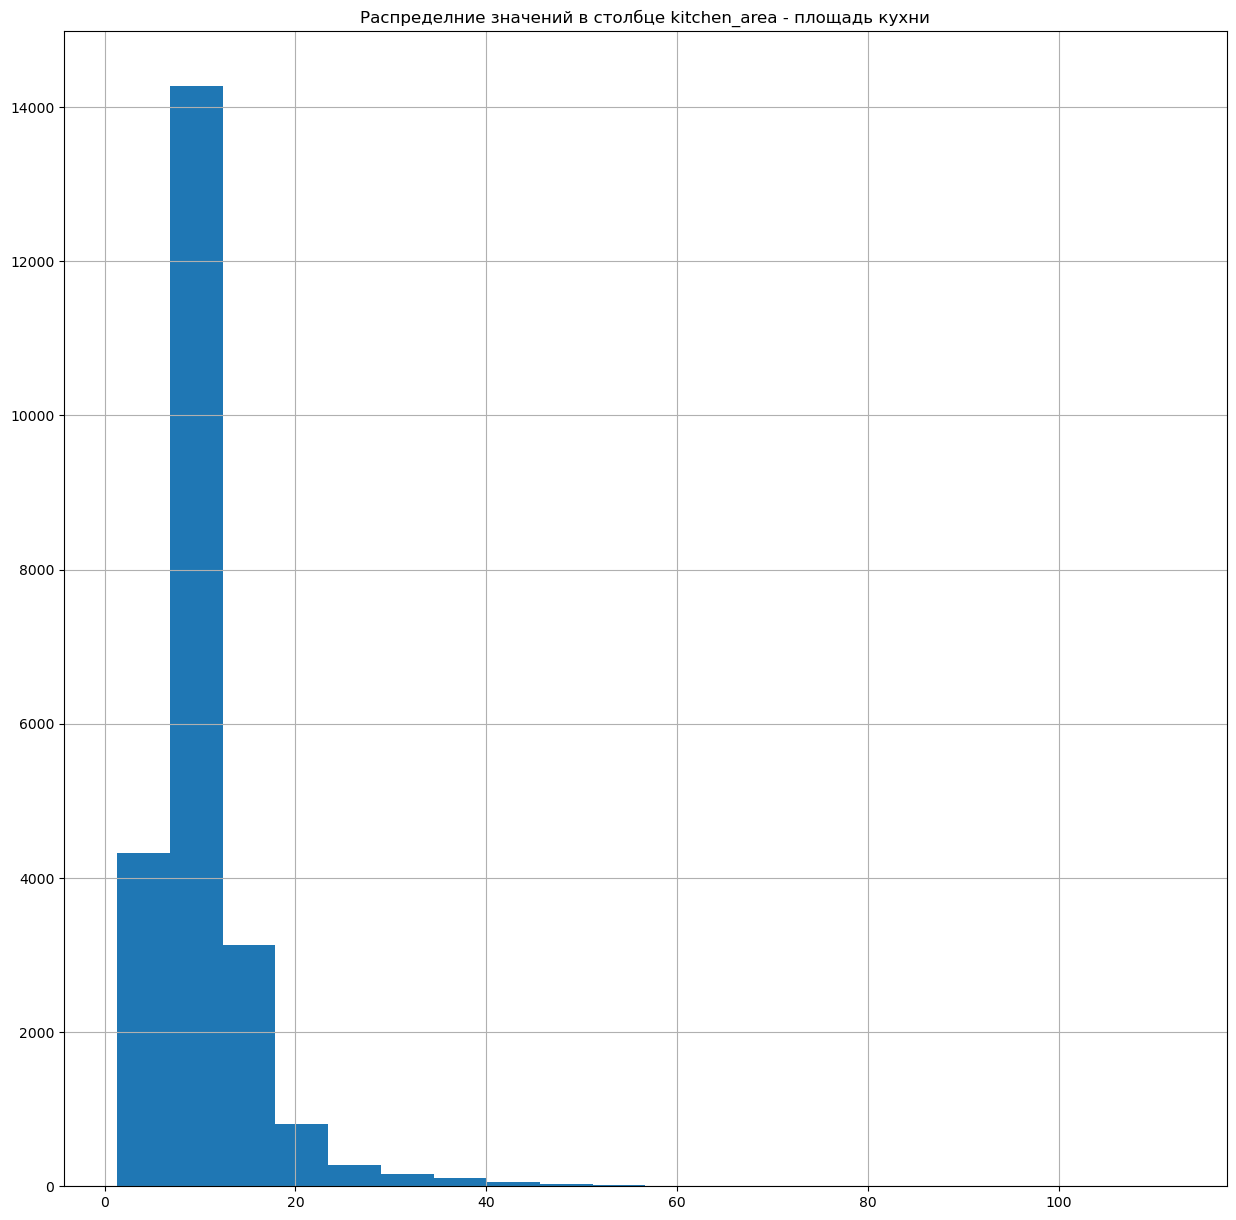

In [46]:
data_estate['kitchen_area'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце kitchen_area - площадь кухни')
pass

В основном площади кухни находится в диапазоне от 5 до 15 метров, может сказать стандартные значения для площади кухни, затем идут кухни больше 15 метров, которых все меньше с увелечнием площади.

Как можно заметить по этим трем графикам, значения у них распределяются одинаково.

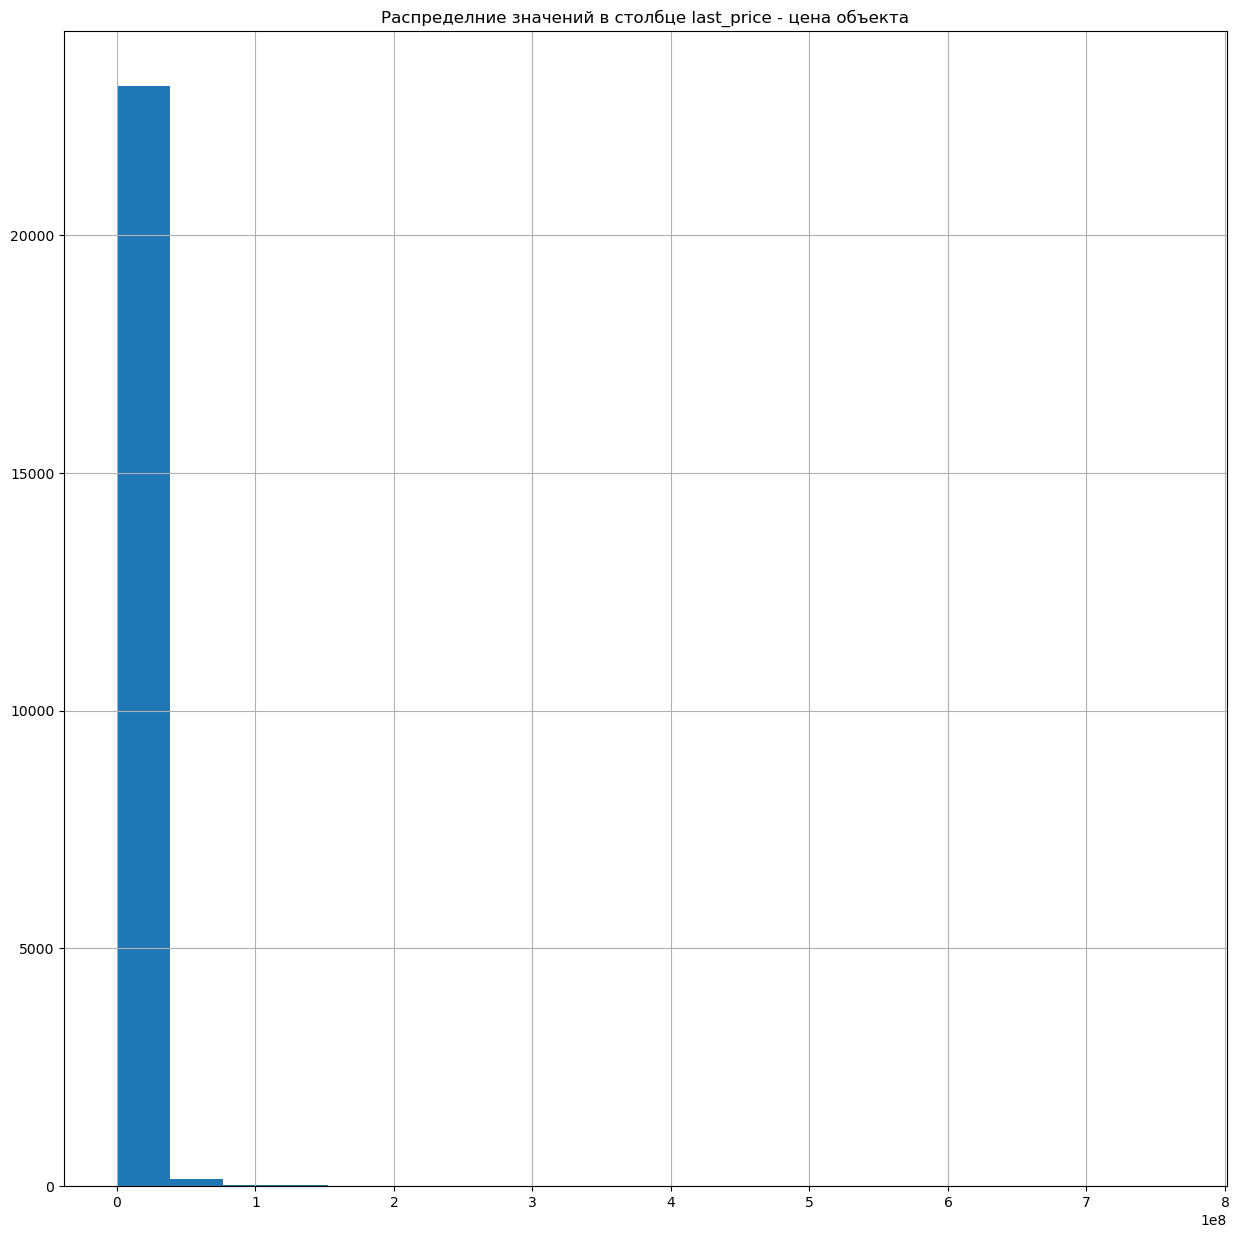

In [47]:
data_estate['last_price'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце last_price - цена объекта')
pass

Основная стоимость недвижимости судя по графику находится в диапозоне от < 1 млн до 20 млн, затем идет резкое снижение, однако есть недвижимость, которая стоит больше 100 миллионов.

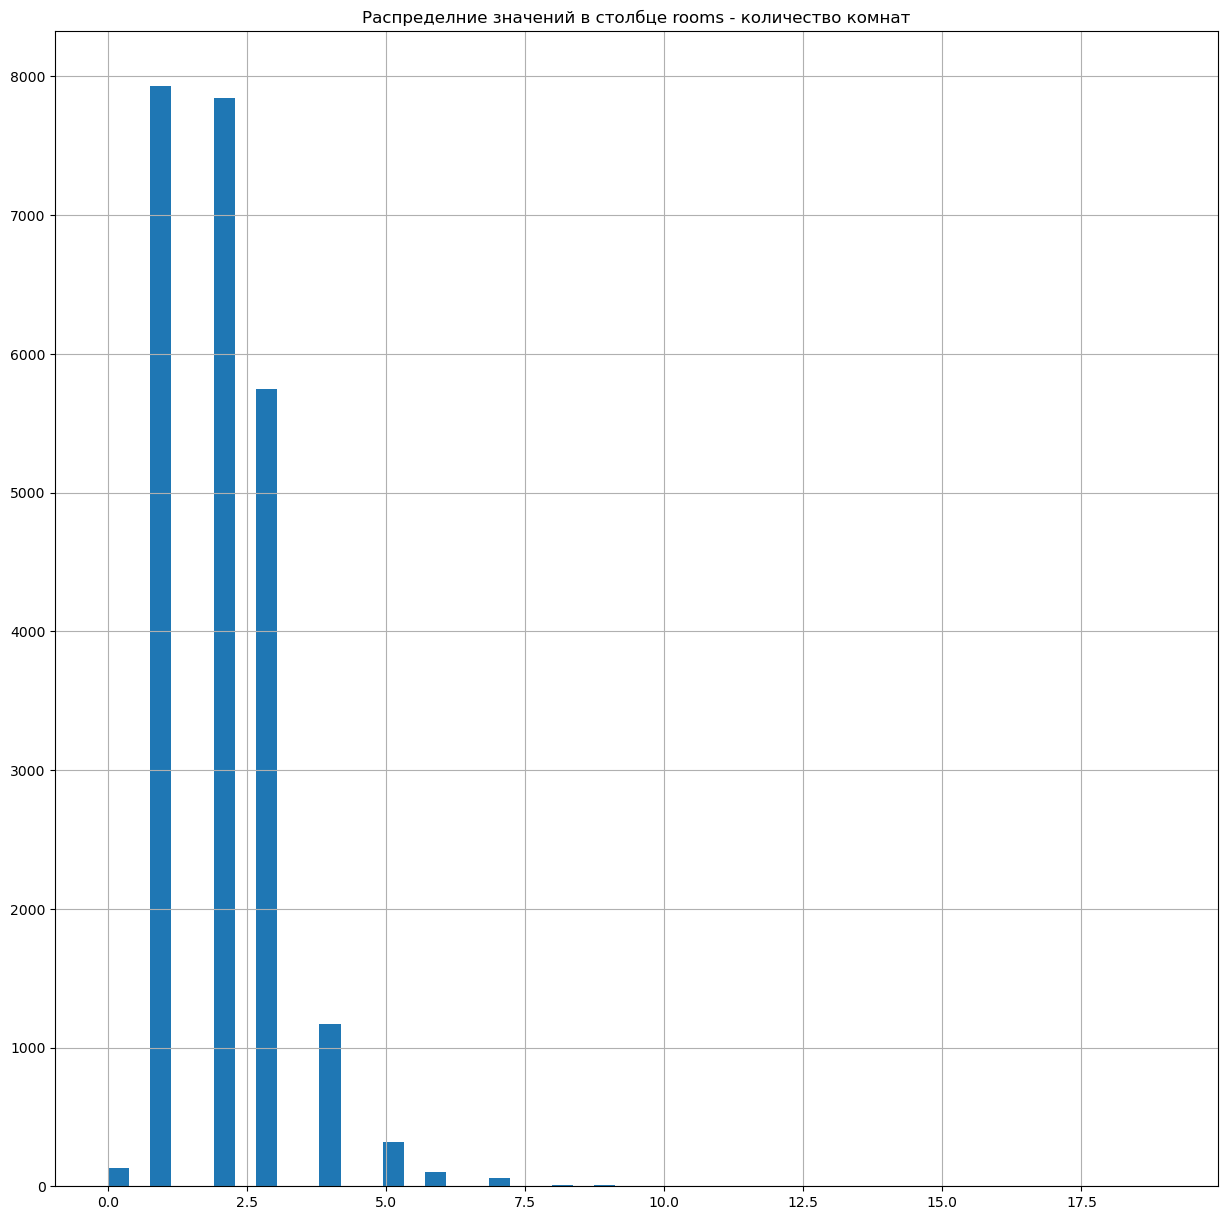

In [48]:
data_estate['rooms'].hist(bins=50, figsize=(15, 15))
plt.title('Распределние значений в столбце rooms - количество комнат')
pass

По графику видно, что у нас есть недвидимость с нулевым количеством комнат, это либо квартиры-студии, либо недвижимость апартаменты, которая не является жилой. Также по графику видно, что больше всего продают однокомнатные и двухкомнатные квартиры - самый ходовой товар на рынке недвижимости.

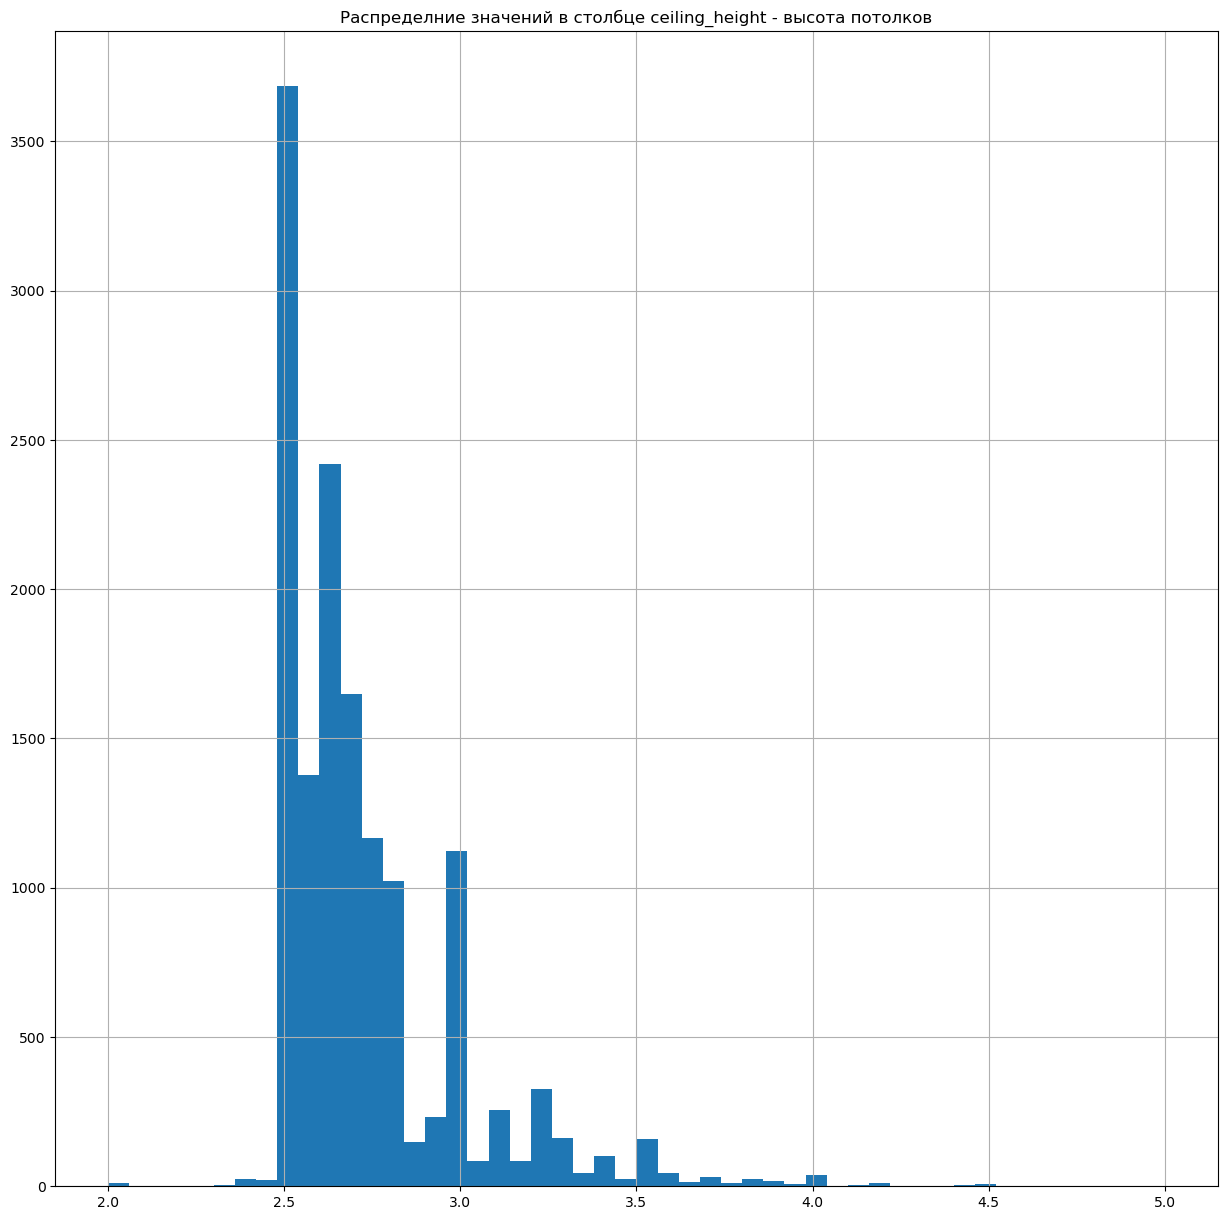

In [49]:
data_estate['ceiling_height'].hist(bins=50, figsize=(15, 15))
plt.title('Распределние значений в столбце ceiling_height - высота потолков')
pass

Высота в потолков в основном находится в диапазоне от 2,5 до 3 метров, что соотвествует стандарту, есть небольшое количество недвидиомсти меньше или больше этих значений, это либо дома старой посторойки, либо индивидуальное строительство.

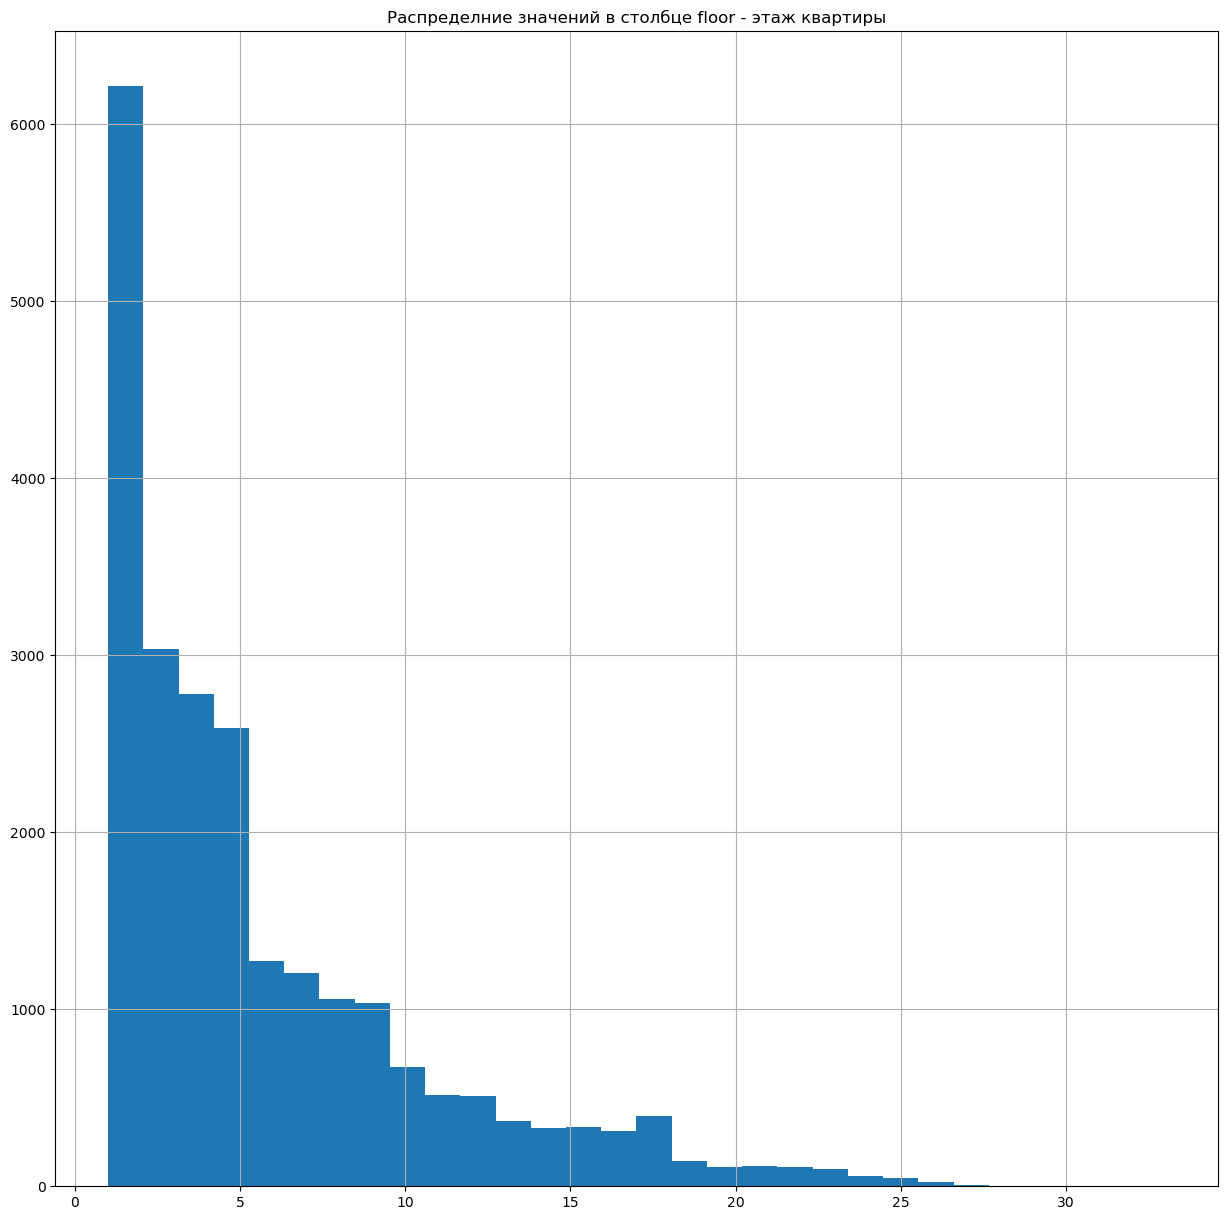

In [50]:
data_estate['floor'].hist(bins=30, figsize=(15, 15))
plt.title('Распределние значений в столбце floor - этаж квартиры')
pass

В основном квартиры продают на невысоких этажах с 2 по 6, больше всего на 2 и 3 этаже, начиная с 4 этажа количество продаваемых квартир на этаже начинает падать, одна из принчина этого - небольшое количество недвижимости из высоток в предоставленных данных. 

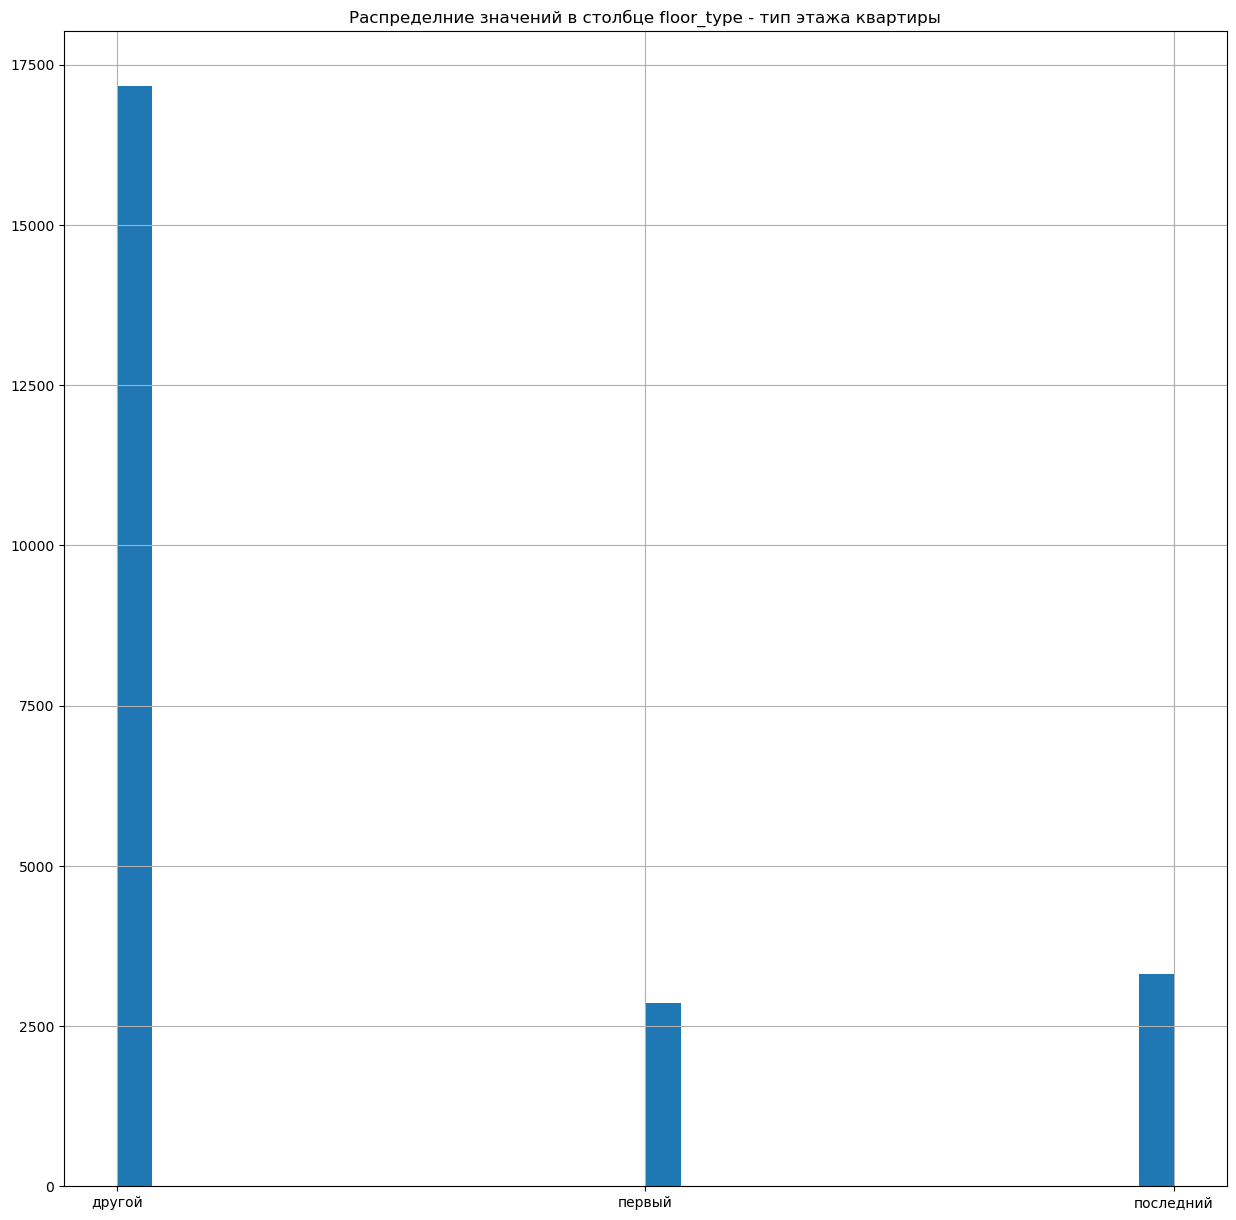

In [51]:
data_estate['floor_type'].hist(bins=30, figsize=(15, 15))
plt.title('Распределние значений в столбце floor_type - тип этажа квартиры')
pass

Большинство недвижимости продается не на первом и не на последнем этаже, что логично, судя по данным полученным из предыдущего графика, где мы узнали, что в основном недвижимость продается на этажах со второго по шестой.

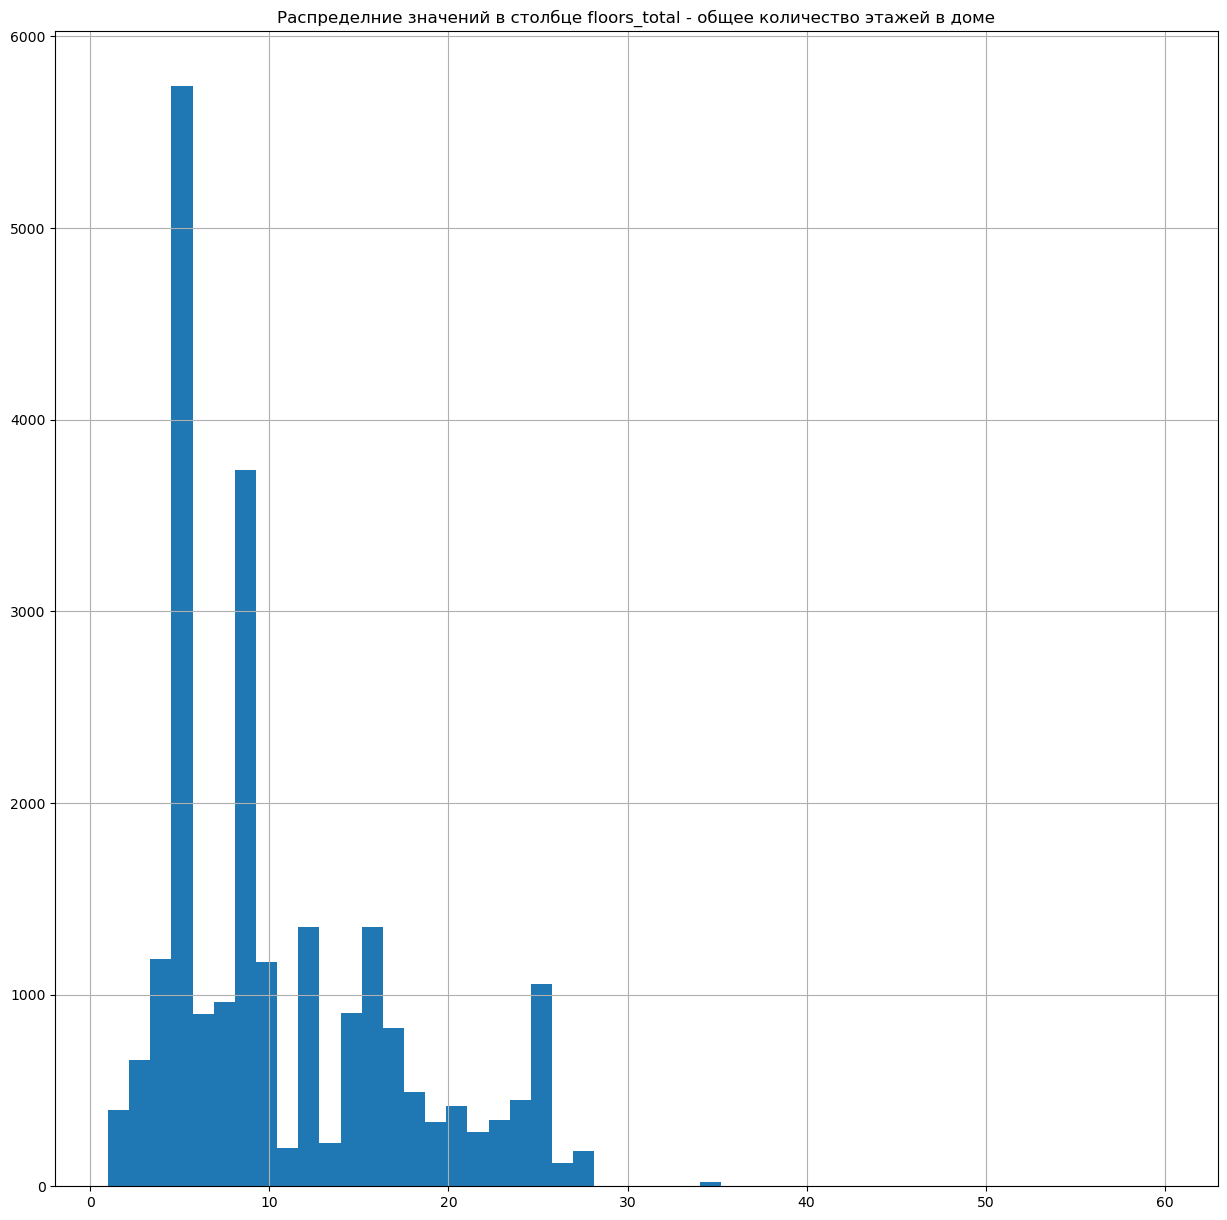

In [52]:
data_estate['floors_total'].hist(bins=50, figsize=(15, 15))
plt.title('Распределние значений в столбце floors_total - общее количество этажей в доме')
pass

В графике видно, что больше всего недвижимости продается в домах меньше 10 этажей, что подтвержадает нашу гипотезу о том, что в основном недвижимость продает на этажах со 2 по 6. Также на графике можно заметить, что есть небольшое количество недвижиости, которое продавали в доме у которого больше 30 этажей.

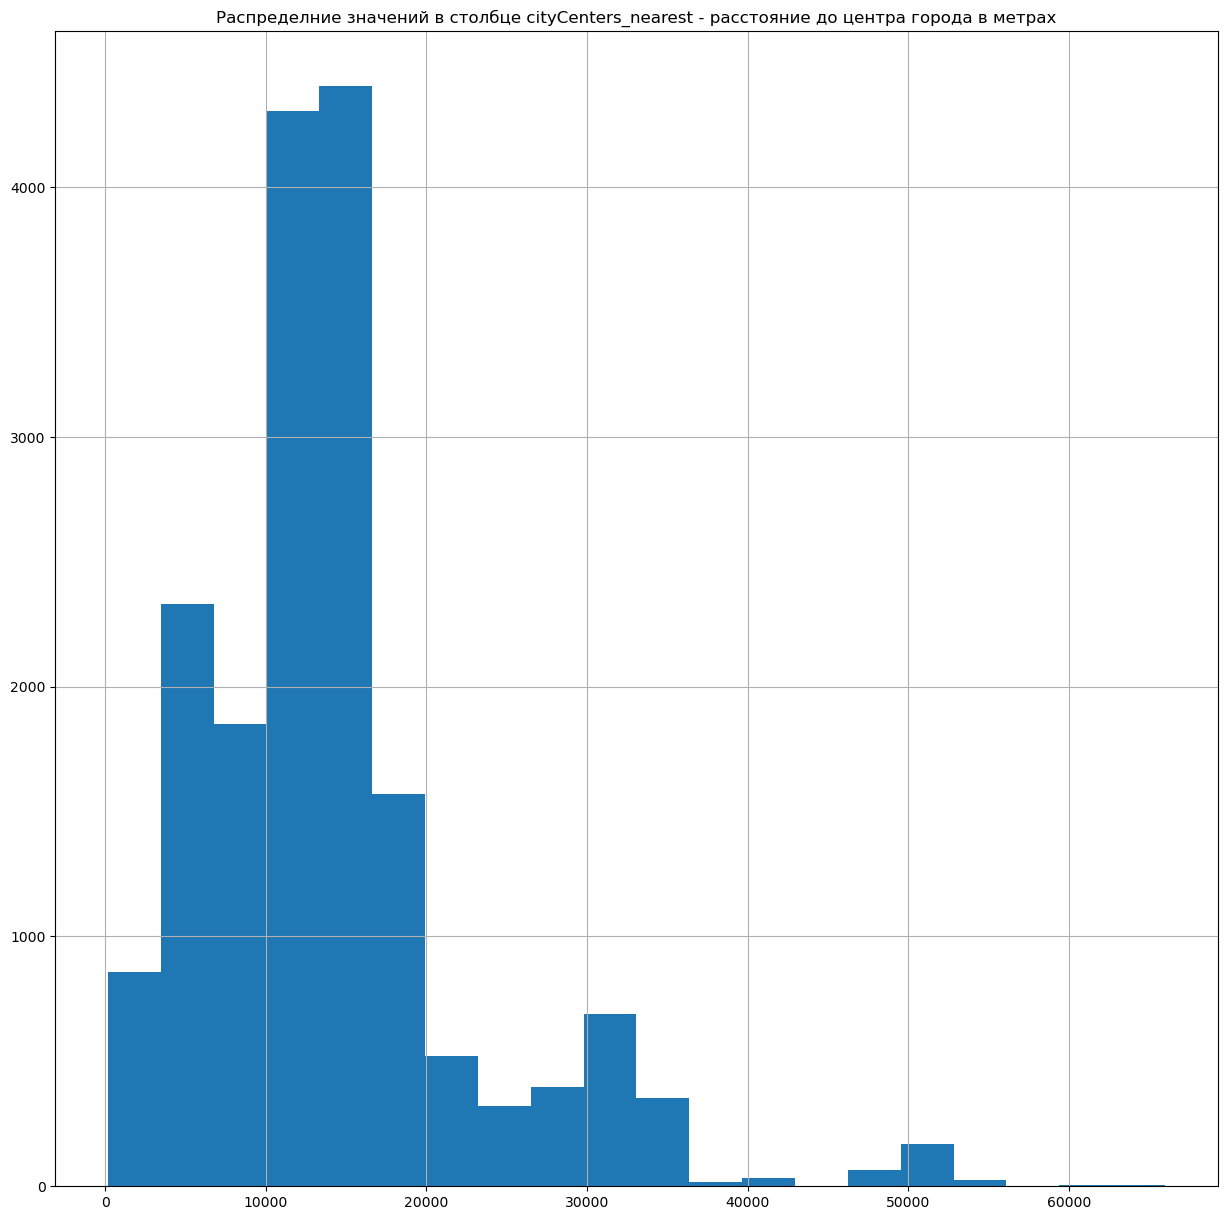

In [53]:
data_estate['cityCenters_nearest'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце cityCenters_nearest - расстояние до центра города в метрах')
pass

Большинство недвижимости продается от 10000 до 20000 метров до центра города, далее по распределнию идет недвижимость ближе к центру города, но её все же меньше, наверное это связано с тем, что недвижимость в центре покупают быстрее. За расстоянием больше 20000 метров продается небольшое количестов недвижимости, вероятно это связано с тем, что такую недвижимость покупают в основном не сильно богатые люди и если вряд ли такую невозможность будут продавать, если нельзя будет при продаже такой неджимости купить более выгодный вариант, также такая недвижимость пользуется меньшим спросом.

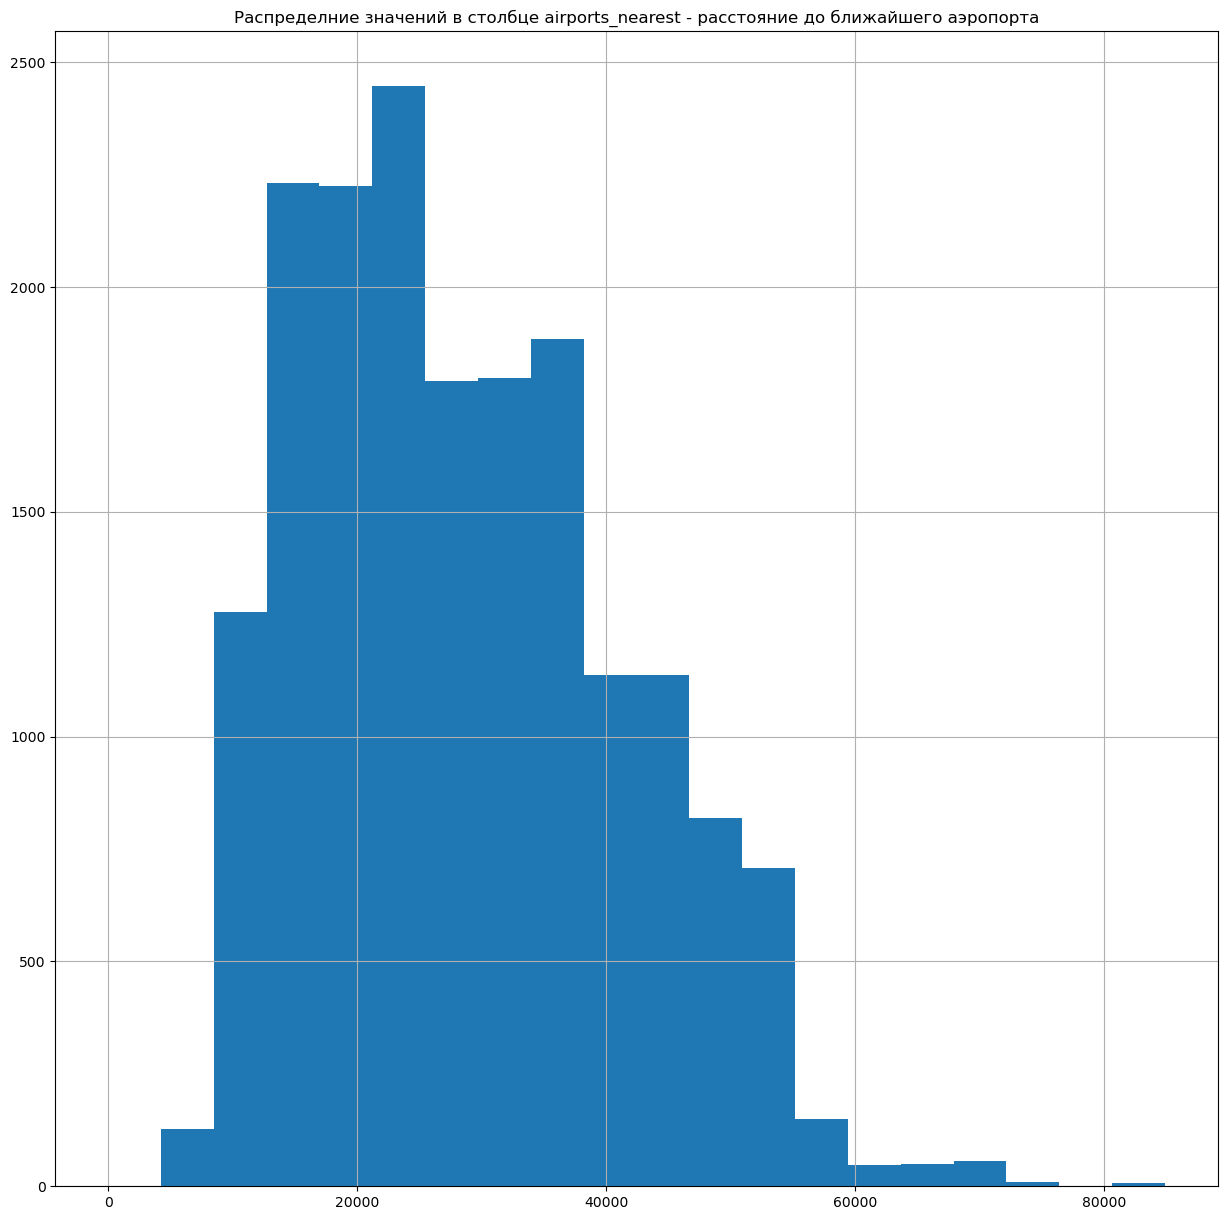

In [54]:
data_estate['airports_nearest'].hist(bins=20, figsize=(15, 15))
plt.title('Распределние значений в столбце airports_nearest - расстояние до ближайшего аэропорта')
pass

Больше всего недвижимости продается в средней удаленности от аэропорта, что логично, рядом нет шума от аэропорта и в случае чего до него недалеко добираться от недвижимости.

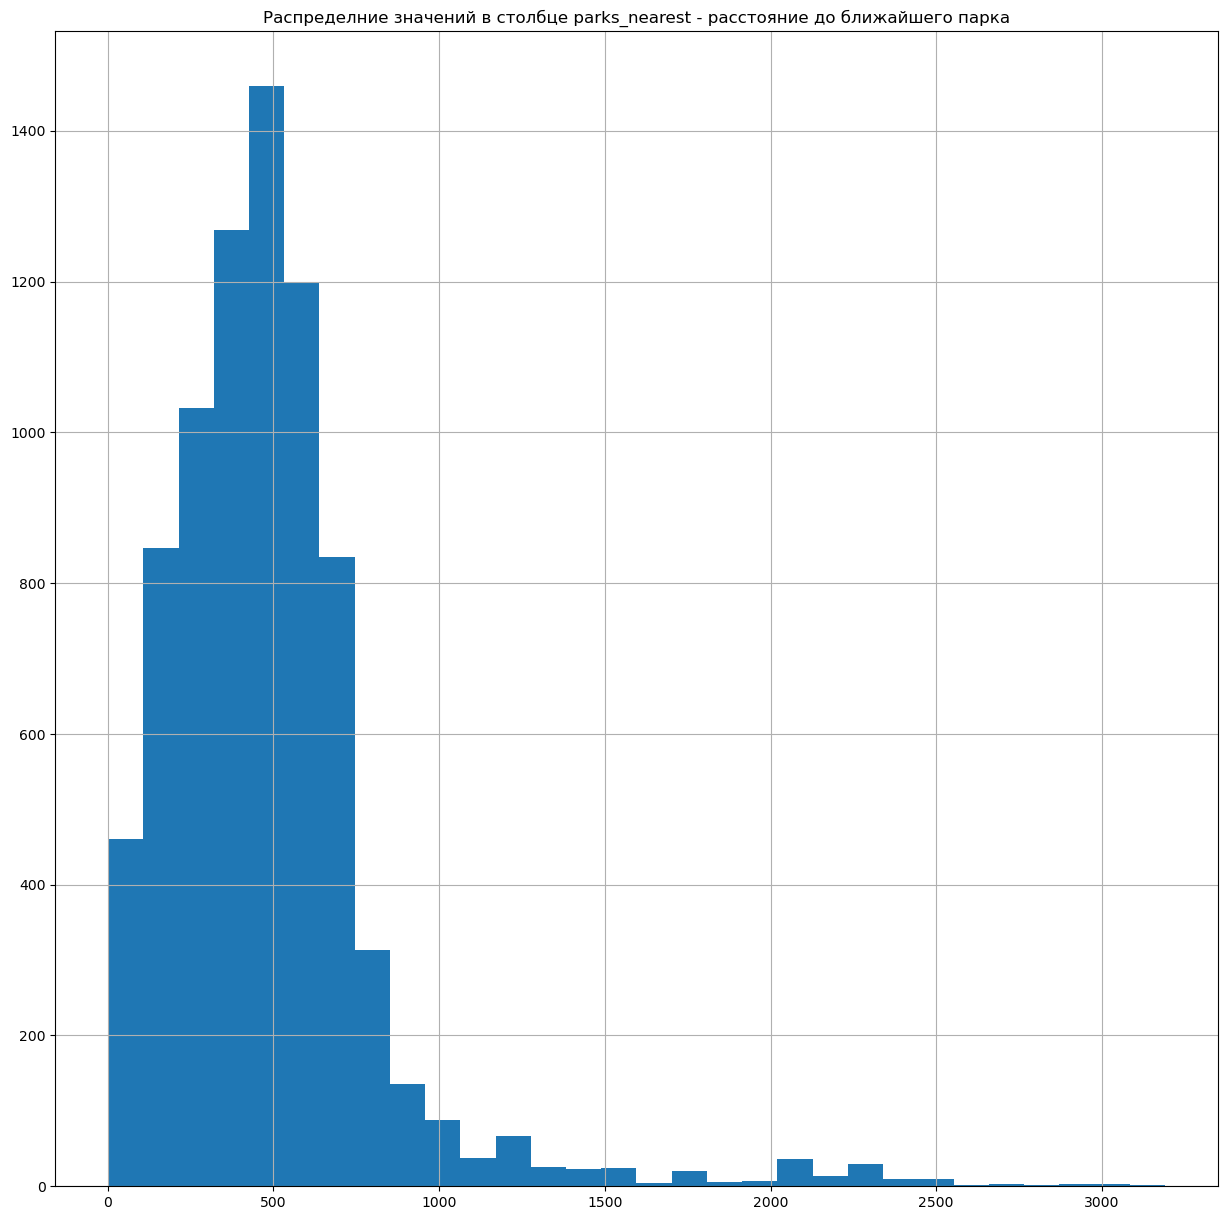

In [55]:
data_estate['parks_nearest'].hist(bins=30, figsize=(15, 15))
plt.title('Распределние значений в столбце parks_nearest - расстояние до ближайшего парка')
pass

Как можно заметить большинство недвижимости продавалось недалеко от парка, что позволяет сделать вывод, что недвижимость возле парков пользуется спросом.

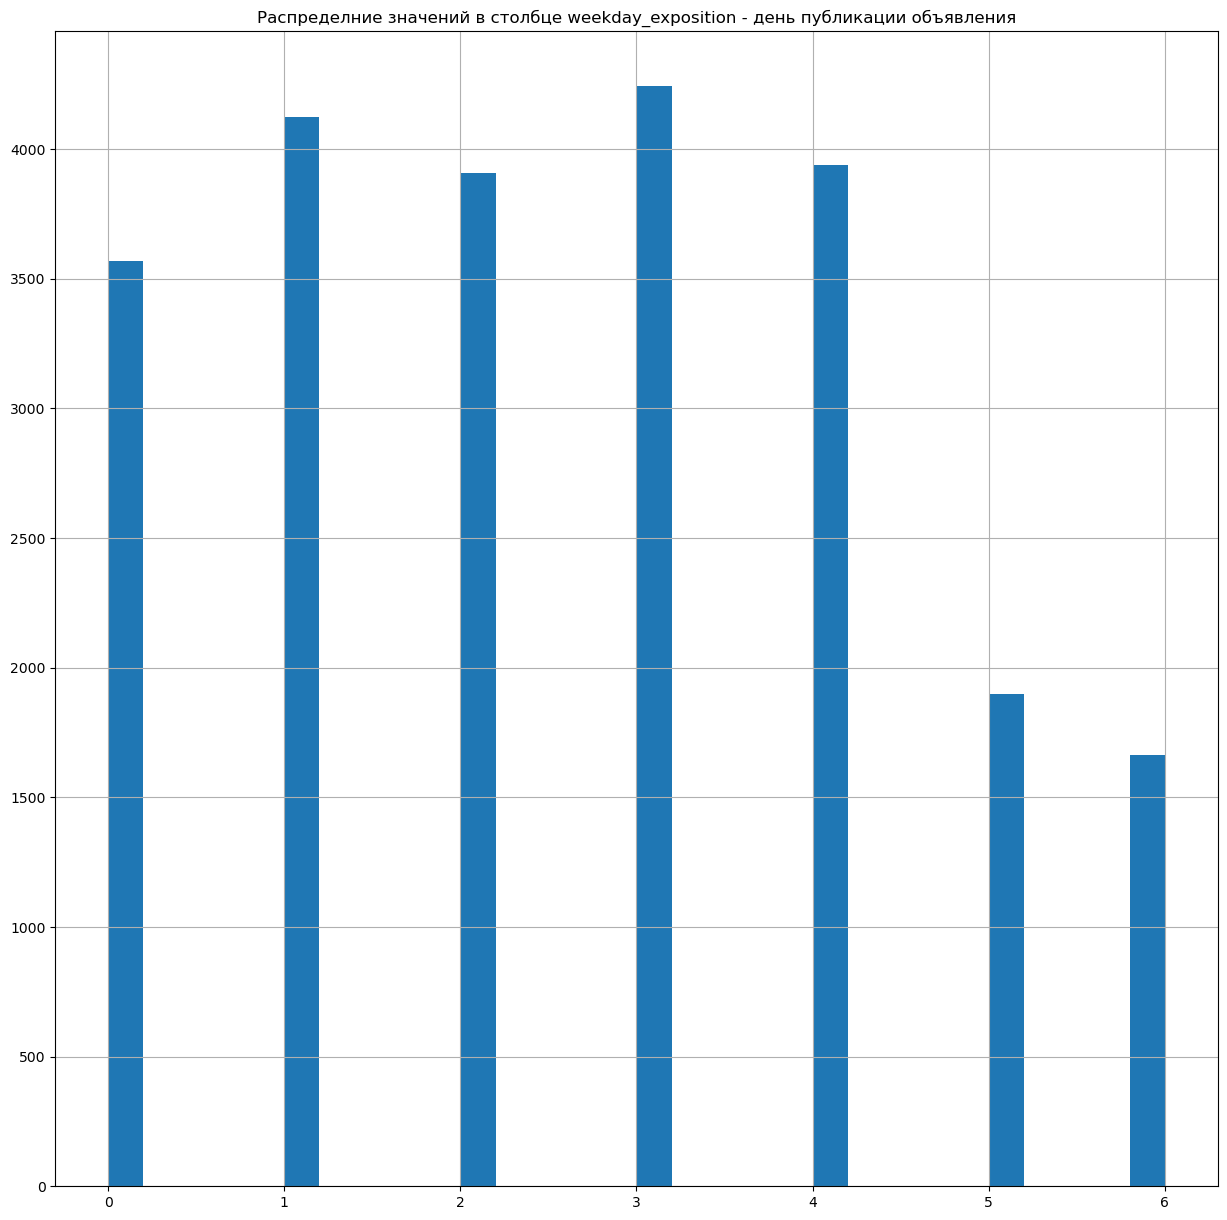

In [56]:
data_estate['weekday_exposition'].hist(bins=30, figsize=(15, 15))
plt.title('Распределние значений в столбце weekday_exposition - день публикации объявления')
pass

Больше всего публикаций объявлений в воскресенье и будни дни, вероятно это связано с тем, что люди в пятницу и субботу в основном отдыхают после рабочей недели и им не до публикации объявлений о продаже недвижимости.

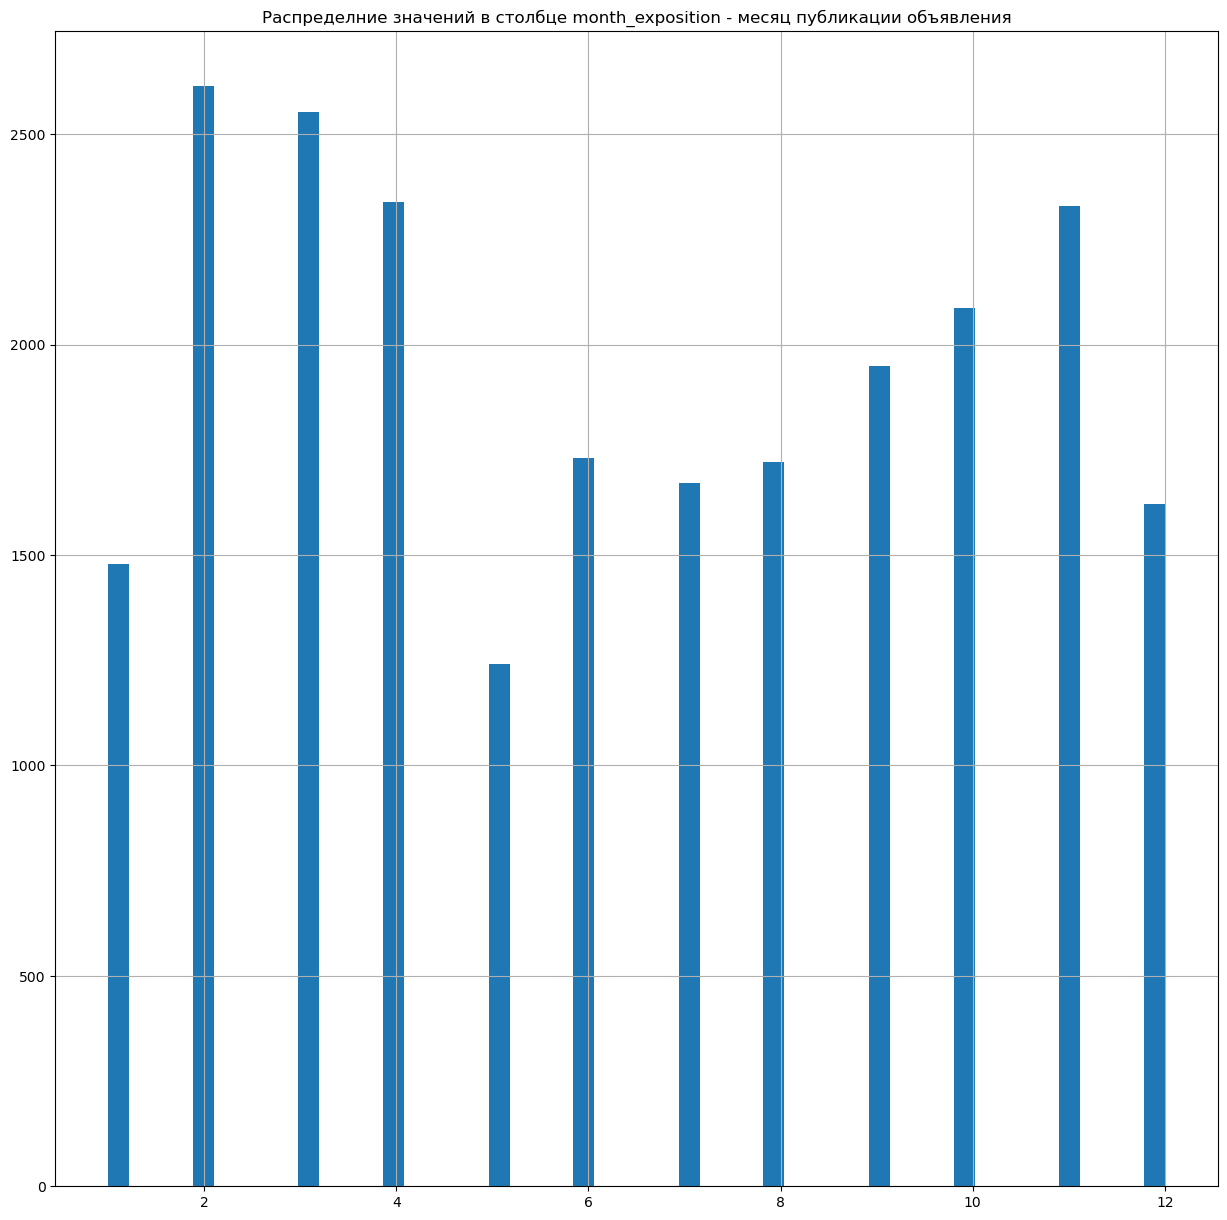

In [57]:
data_estate['month_exposition'].hist(bins=50, figsize=(15, 15))
plt.title('Распределние значений в столбце month_exposition - месяц публикации объявления')
pass

Как видно по графику меньше всего объявлении о продаже недвижимости в январе, мае и декабре, в январе и мае это связано с тем, что в эти месяцы больше всего праздничных дней и люди в основном отдыхают, в декабре люди закрывают накопившиеся дела за год и тратятся на подготовку к новому году и им не до продажи недвижимости.

Изучим как быстро продавалась недвижимость, построим гистрограмму по столбцу `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) и рассчитаем по этому столбцу среднее и медиану.

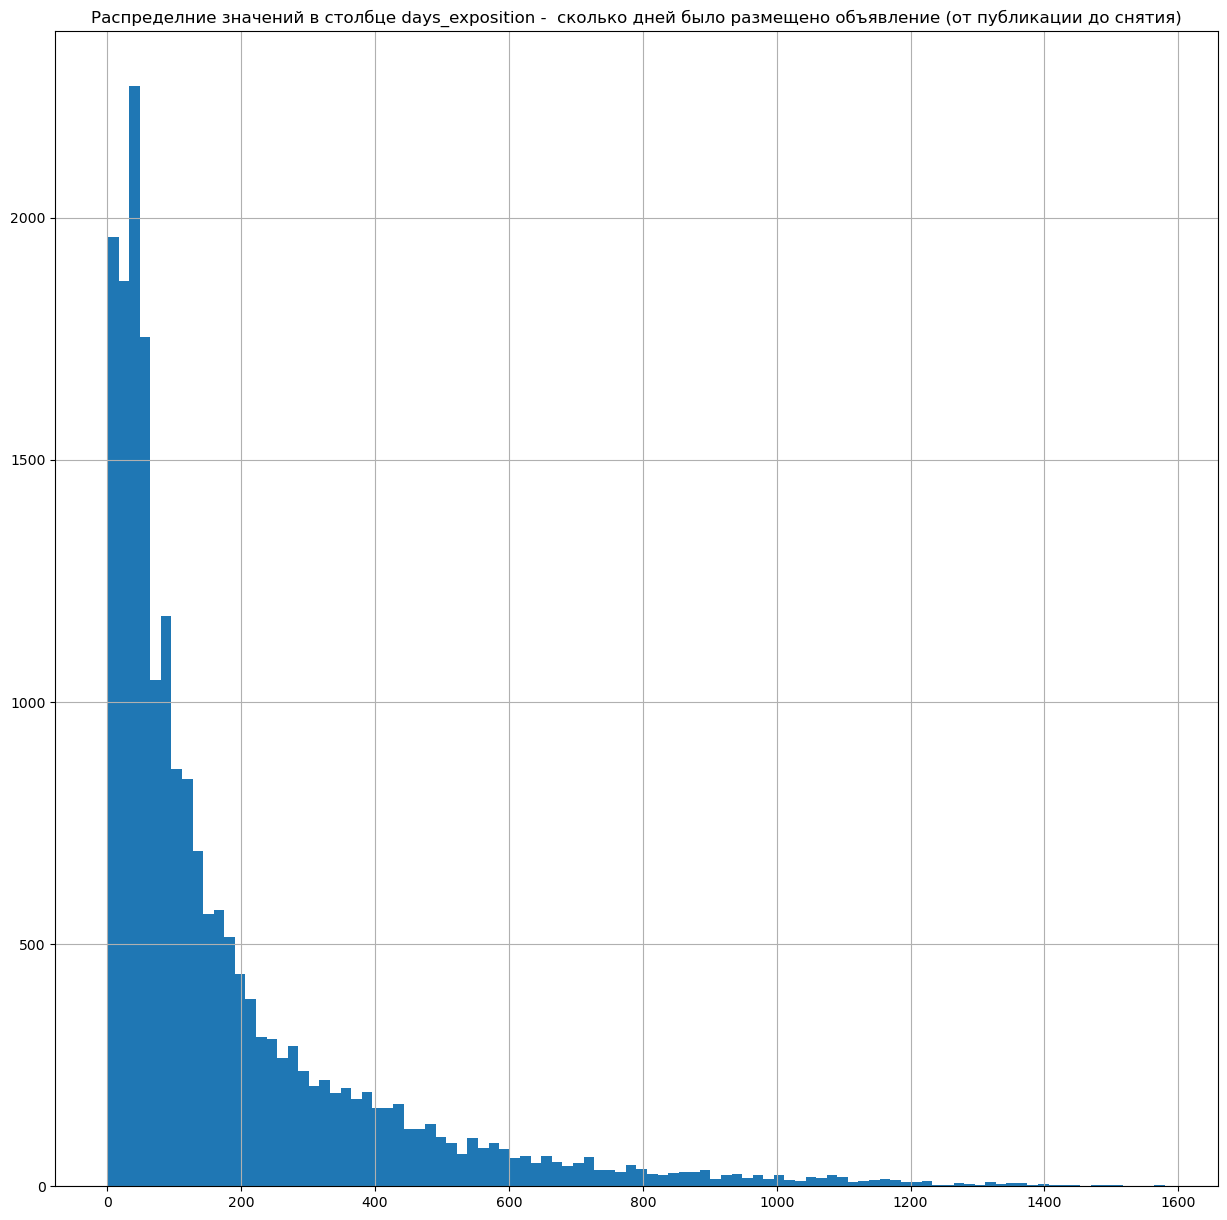

In [58]:
data_estate['days_exposition'].hist(bins=100, figsize=(15, 15))
plt.title('Распределние значений в столбце days_exposition -  сколько дней было размещено объявление (от публикации до снятия)')
pass

По графику видно, что  большинство недивжимости продается в среднем где-то за 50 дней, что соотвествует действительности, у нас данные по Лениградской области, там недвидимость пользуются спросом, по сути это вторая область по популярности в стране после Московской. Вот, если мы будем рассматривать области из Дальнего Востока или Сибира, то там недвижимость будет продавать минимум в два раза дольше, так как регионы меньше пользуются спросом в плане недвижимости. Также на такое количество дней по продаже недвижимости может влиять оформленная ипотека, так как она ается на 3 месяца и люди в течении трех месяцев должны найти себе недвижимость, чтобы не переоформлять заявку на ипотеку, а за это время может и доход поменяться и процентная ставка по ипотеке вырасти, и еще нужно успеть проверить все документы по квартире.

Посмотри какое значение медианы и среднего в этом столбце:

In [59]:
print('Медиана по столбцу days_exposition', data_estate['days_exposition'].median())
print('Cреднее по столбцу days_exposition', data_estate['days_exposition'].mean())

Медиана по столбцу days_exposition 96.0
Cреднее по столбцу days_exposition 181.29606143175624


Медиана в два раза больше, чем количество дней за которое продают больше всего квартир, также в предоставленных данных видно, что недвижимость в среднем продают за полгода.
Для определения быстрых и медленных продаж будем использовать квантили, для этого построим график "ящик с усами" или диаграмму размаха для столбца `days_exposition`.

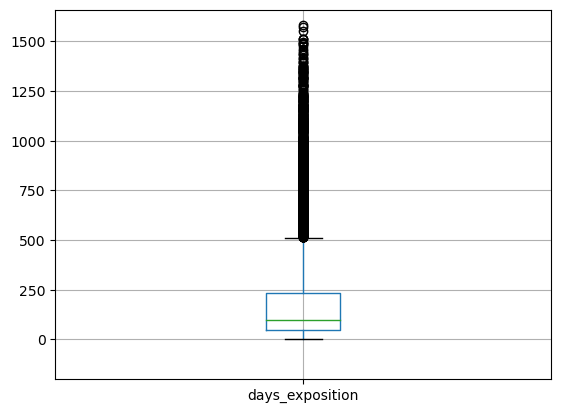

In [60]:
data_estate.boxplot(column=['days_exposition'])
plt.ylim(-200)
pass

Построим еще одну диаграмму размаха, с диапазоном от 510 до 520 по оси ординат, чтобы определить с какого значения начинаются выбросы на графике.

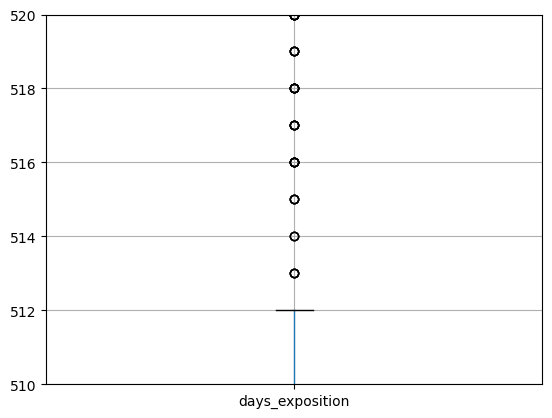

In [61]:
data_estate.boxplot(column=['days_exposition'])
plt.ylim(510, 520)
pass

Посмотрим характеристики столбца `days_exposition`

In [62]:
data_estate['days_exposition'].describe()

count    20185.000000
mean       181.296061
std        220.096470
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вернемся теперь к графику "ящик с усами", нам нем видно, что от значений, которые больше 500 дней, идет жирная линия, это значения больше межквартального размаха, то есть это выбросы в данных, такие продажи можно считать слишком медленными. Минимальное количество дней за которое смогли продать квартиру - это 1 день. Если мы обратимся к классификации по типу продажи в зависимости от количества, то получим следующее:

- Стандартная продажа - около 90 дней;
- Срочная продажа - до 30 дней;
- Срочный выкуп - от 3 до 14 дней.

Если мы еще раз посмотри на нашу гистограмму, где видно что один столбец гистограммы составляет где-то 15 дней, то увидим, что больше 3000 квартир были оформлены как срочные продажи или как срочный выкуп, маловероятно, что такое количество квартир могли так продать, вот если бы первые два столбца имели высоту, как столбцы в конце гистограммы, то это больше было бы похоже на правду. Сами объявления о срочное продажи или о срочном выкупе квартиры появляются не так часто, да и когда человек видит, например, в объявлении о продаже недвижимости, что это срочная продажа, то его первая мысль будет о том, что "с этой квартирой что-то не так, почему её пытаются срочно продать?"

На основании выше изложенного будем считать слишком быстрые продажи те, что меньше первого квартиля, то есть меньше 45 дней, а медленные те, что больше 512 дней, так как на графике видно, что начиная с этого значения идут выбросы.

Изучим какие факторы влияют на стоимость недвижимости, посмотрим зависит ли цена от следующих значений:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики зависимости цены от указанных значений выше указанных столбцах.

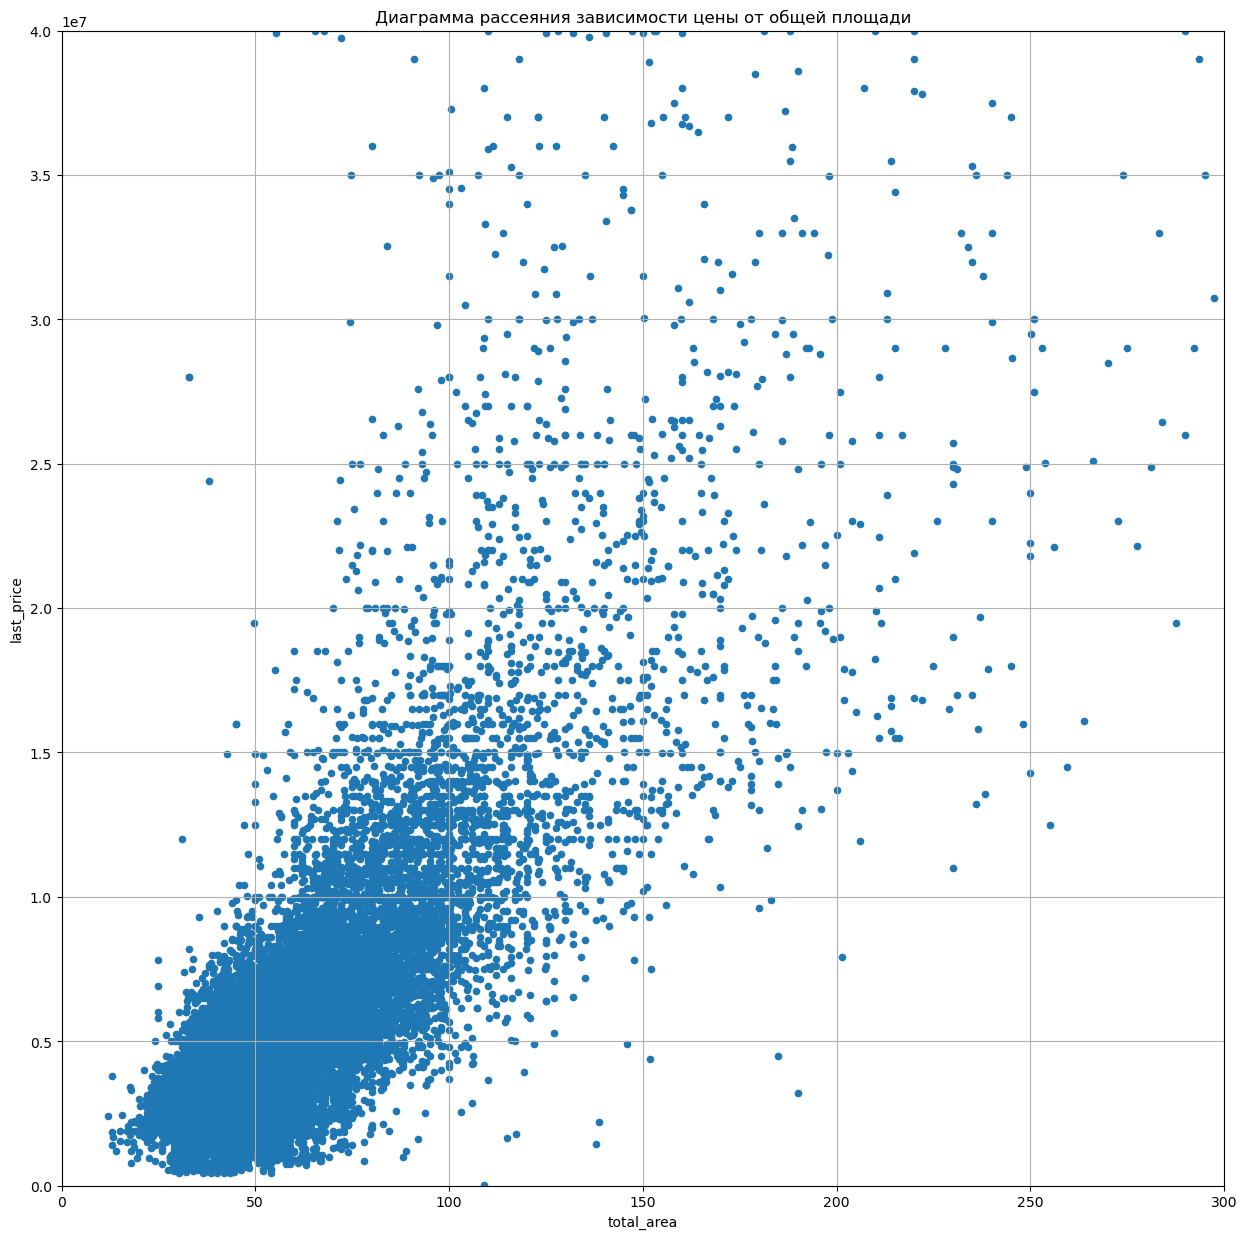

In [63]:
data_estate.plot(x='total_area', y='last_price', kind='scatter', figsize=(15, 15), grid=True, xlim=[0, 300], 
                 ylim=[0, 40000000], title='Диаграмма рассеяния зависимости цены от общей площади')
pass

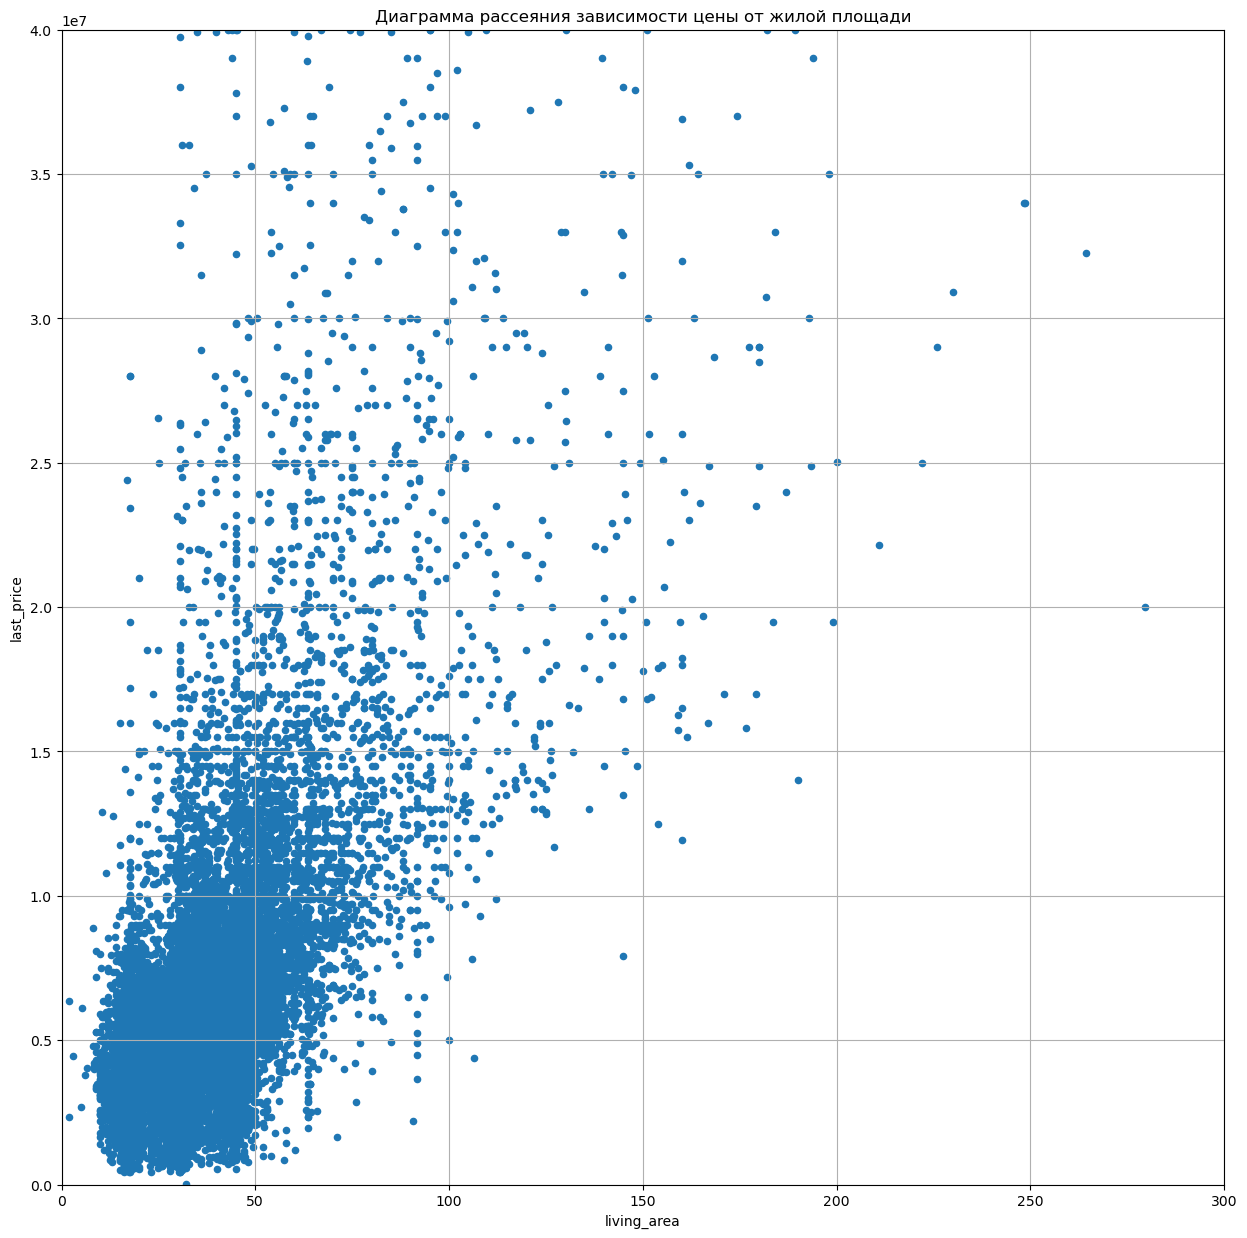

In [64]:
data_estate.plot(x='living_area', y='last_price', kind='scatter', figsize=(15, 15), grid=True, xlim=[0, 300],
                 ylim=[0, 40000000], title='Диаграмма рассеяния зависимости цены от жилой площади')
pass

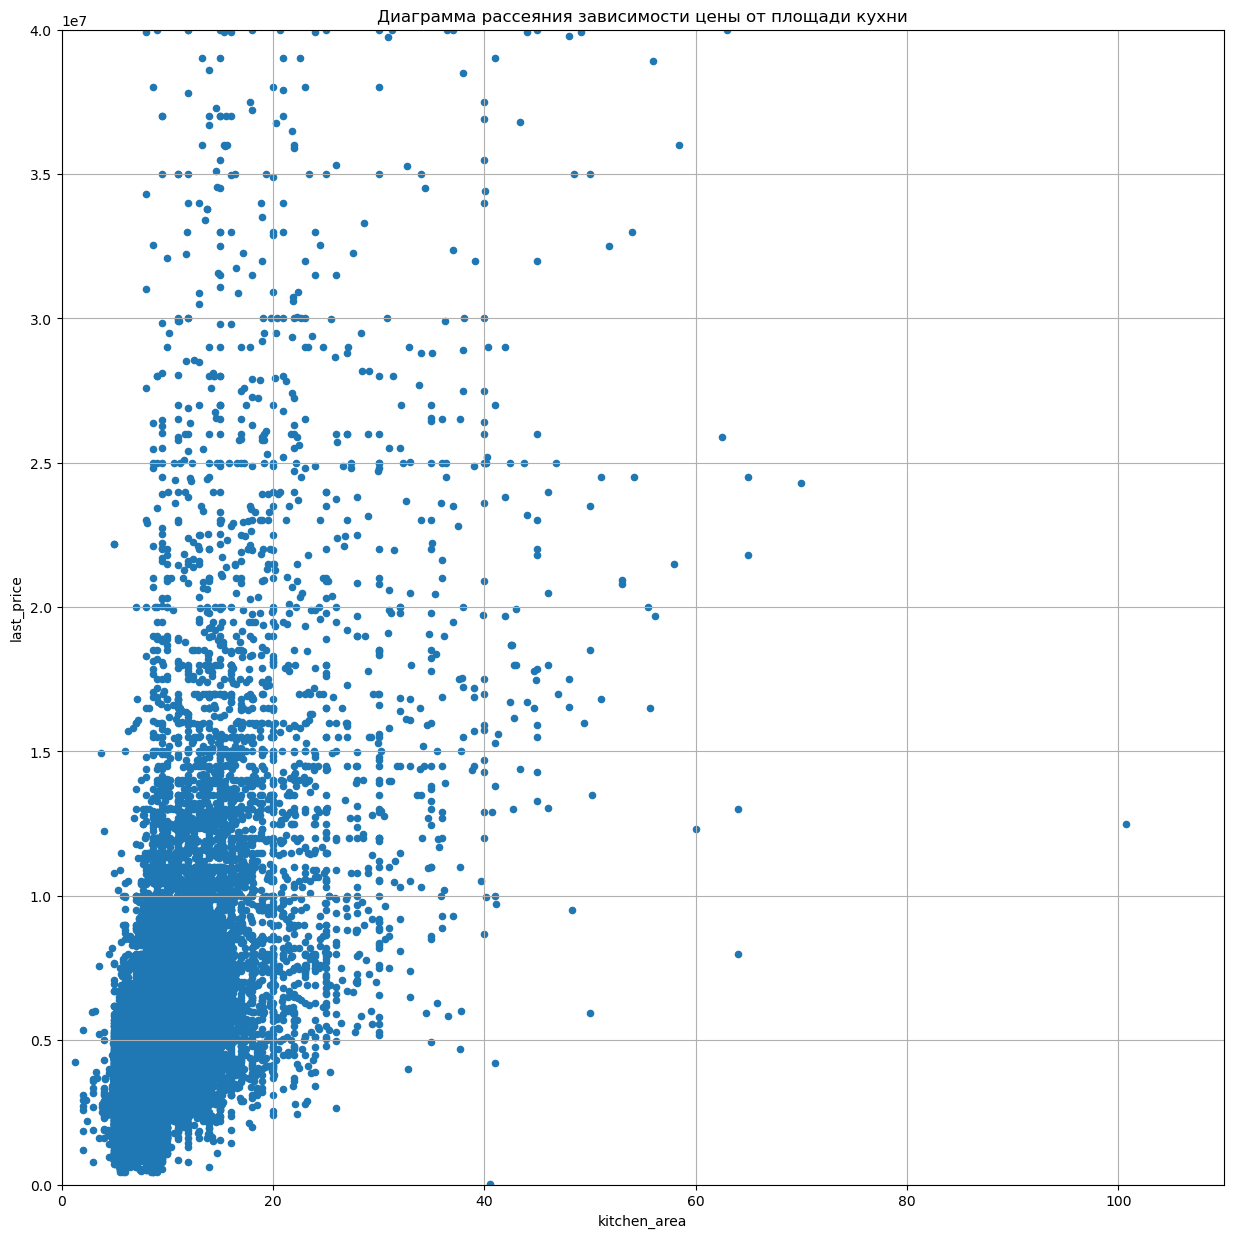

In [65]:
data_estate.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(15, 15), grid=True, xlim=[0, 110],
                 ylim=[0, 40000000], title='Диаграмма рассеяния зависимости цены от площади кухни')
pass

Так как по количеству комнат мы можем сгруппировать значения, построим столбчатую диаграмму, сгруппируем данные по количеству комнат и посчитаем среднюю цену, затем постоим график.

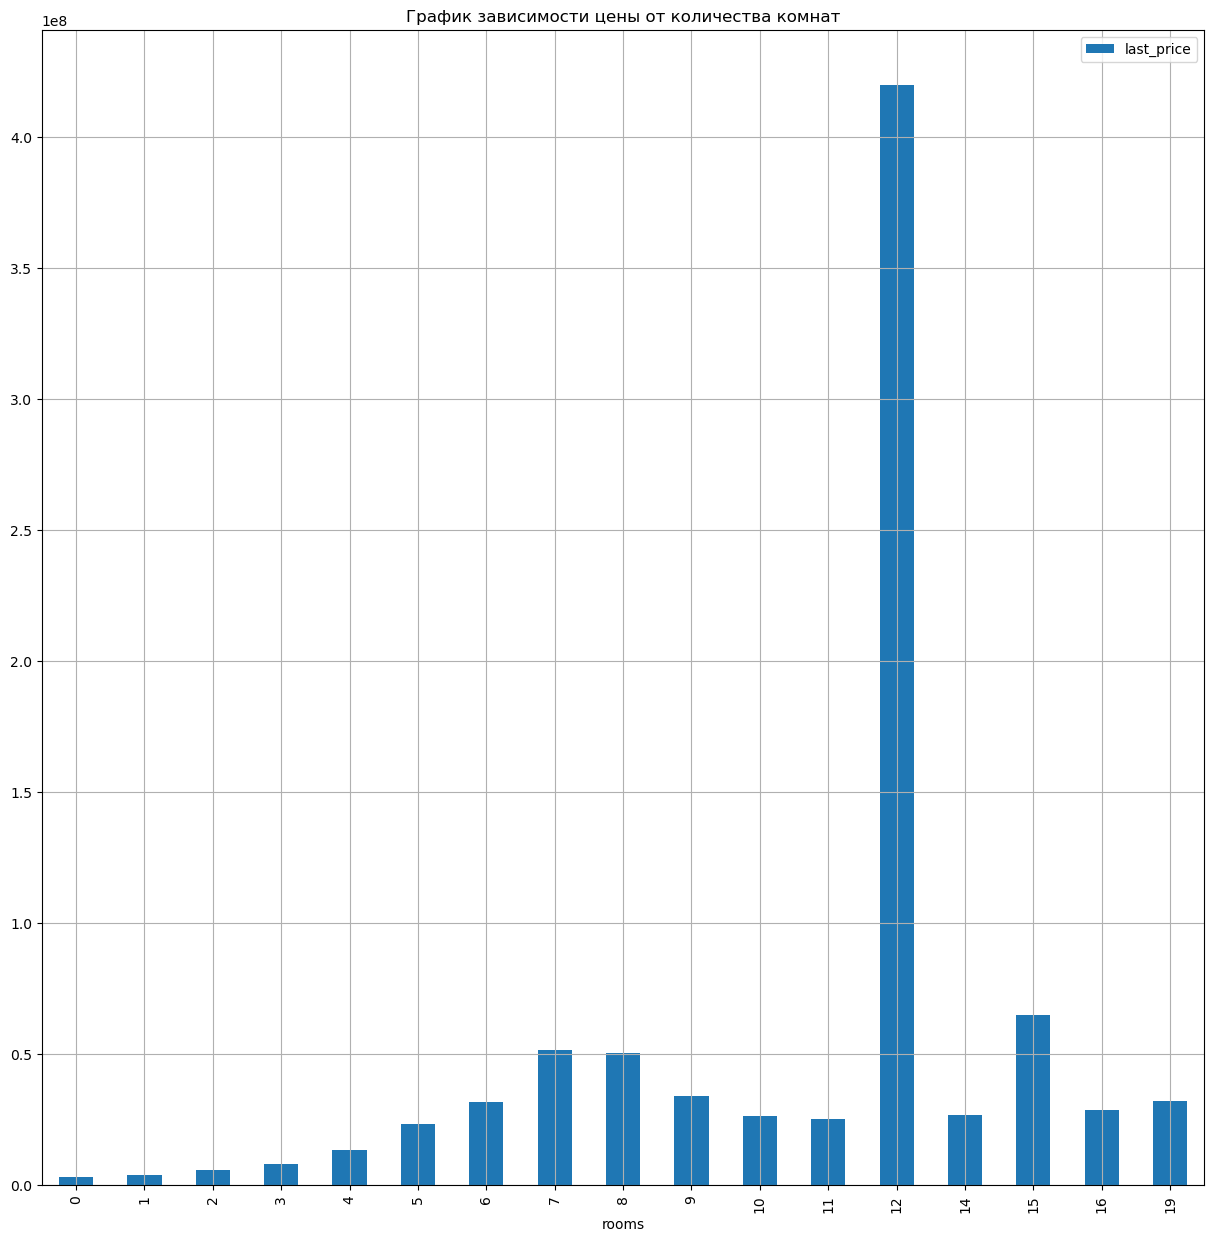

In [66]:
data_estate.pivot_table(index=['rooms'], values=['last_price'], aggfunc='mean').plot(grid=True,
    y='last_price', kind='bar', figsize=(15, 15), title='График зависимости цены от количества комнат')
pass

Аналогично тому как постоили график зависимости цены от количества комнат, построим графики зависимости цены от типа этажа и  даты размещения (день недели, месяц, год).

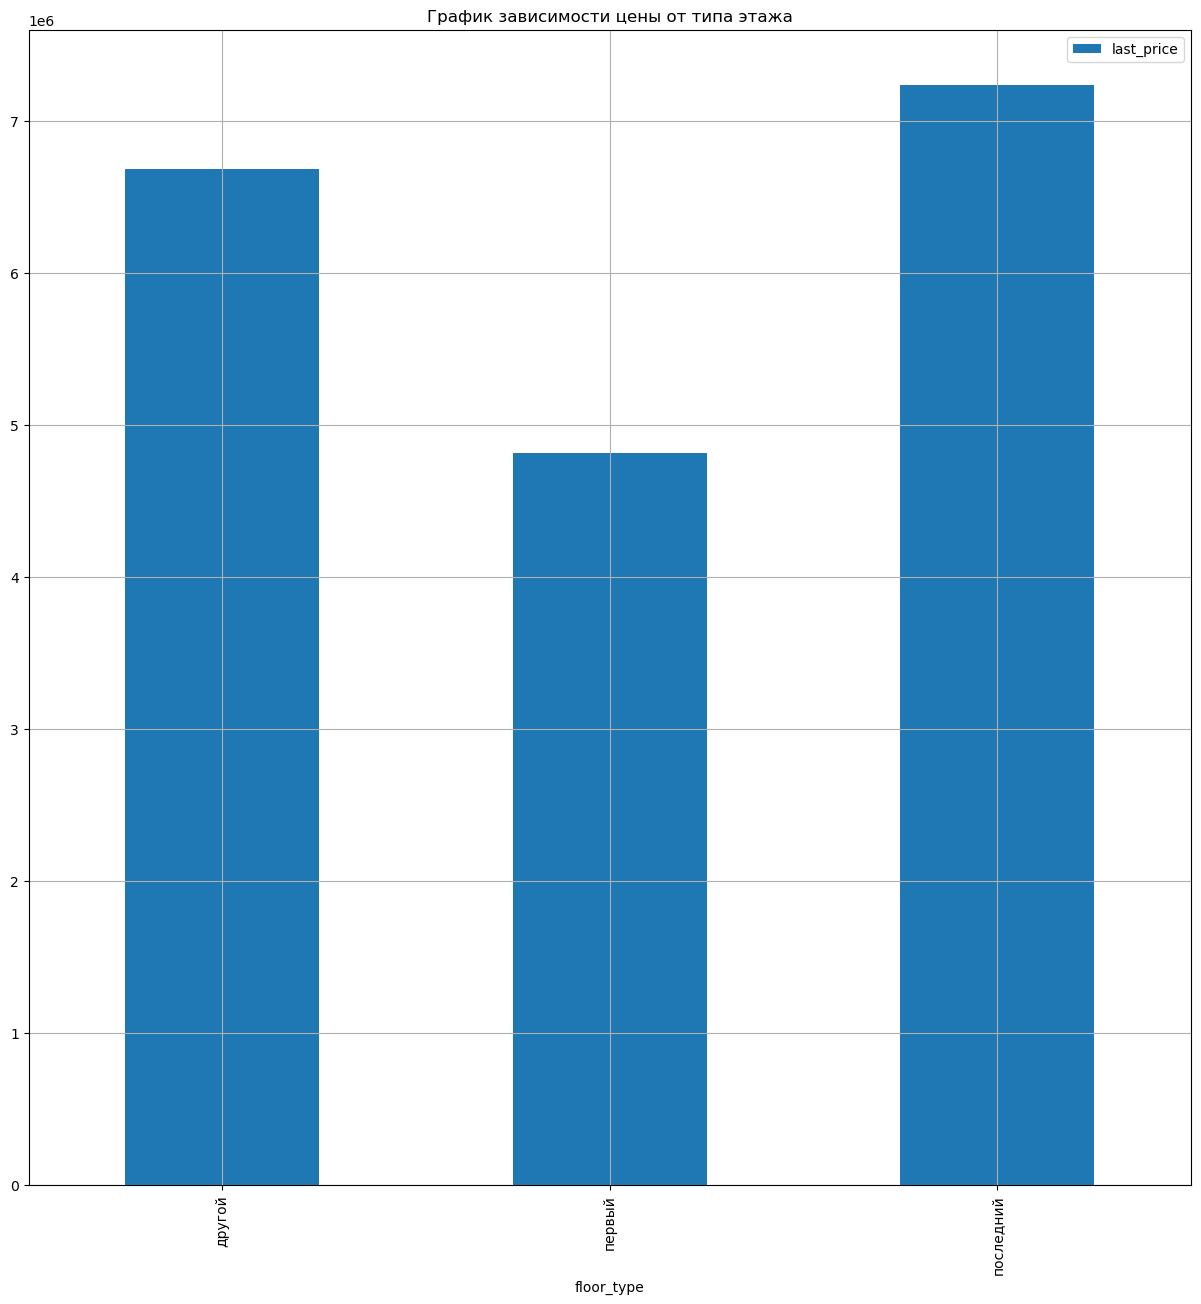

In [67]:
data_estate.pivot_table(index=['floor_type'], values=['last_price'], aggfunc='mean').plot(grid=True,
    y='last_price', kind='bar', figsize=(15, 15), title='График зависимости цены от типа этажа')
pass

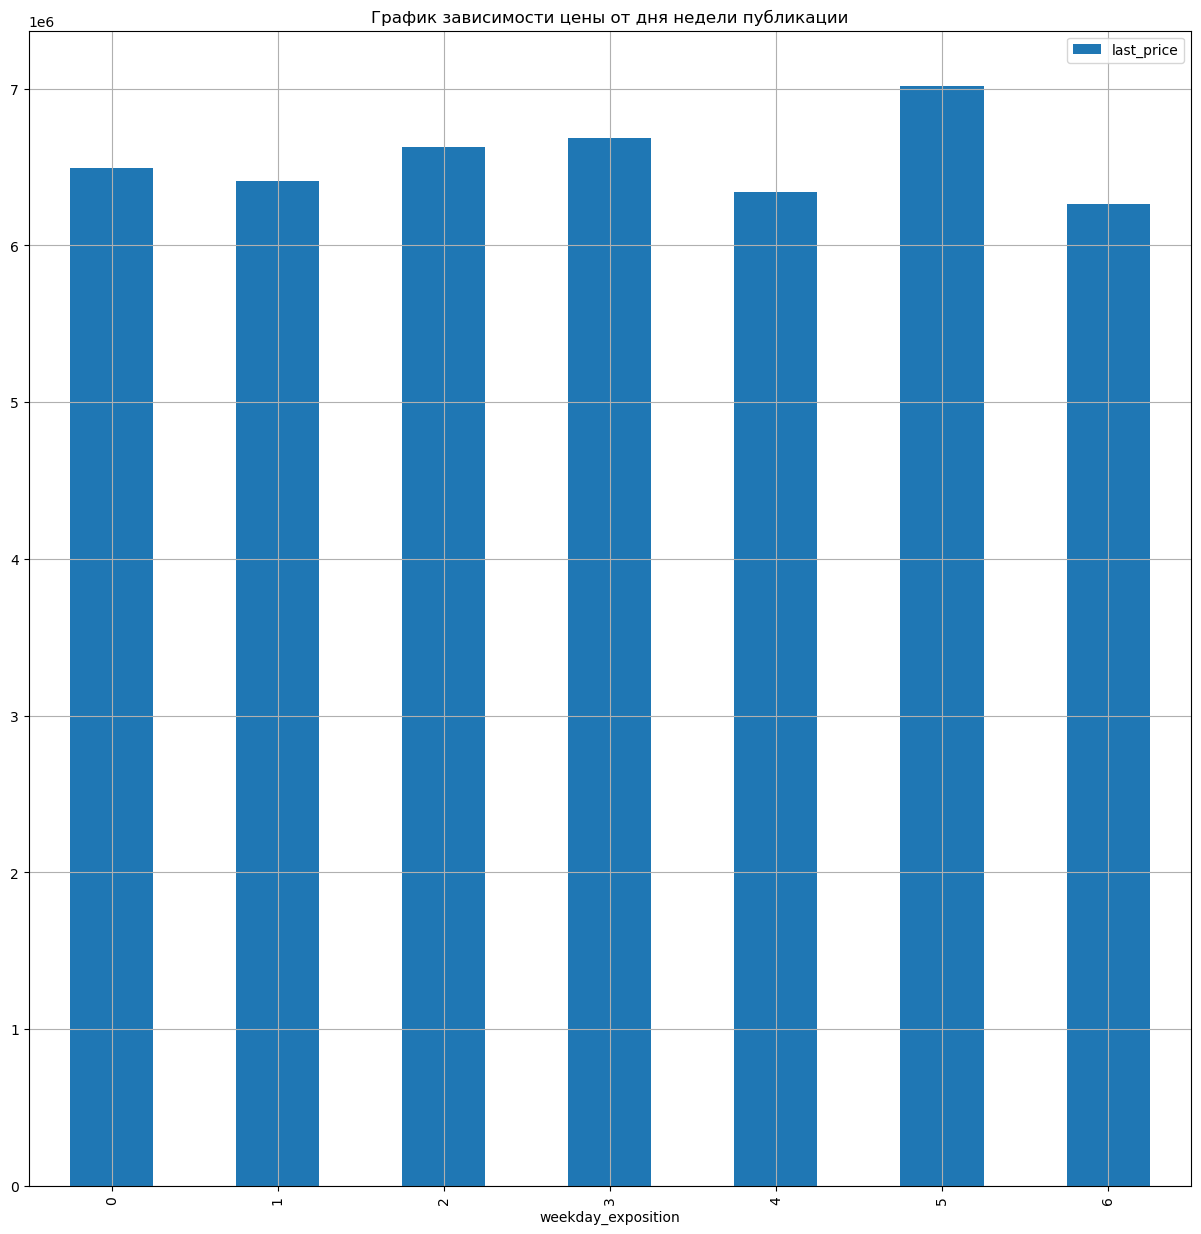

In [68]:
data_estate.pivot_table(index=['weekday_exposition'], values=['last_price'], aggfunc='mean').plot(grid=True,
    y='last_price', kind='bar', figsize=(15, 15), title='График зависимости цены от дня недели публикации')
pass

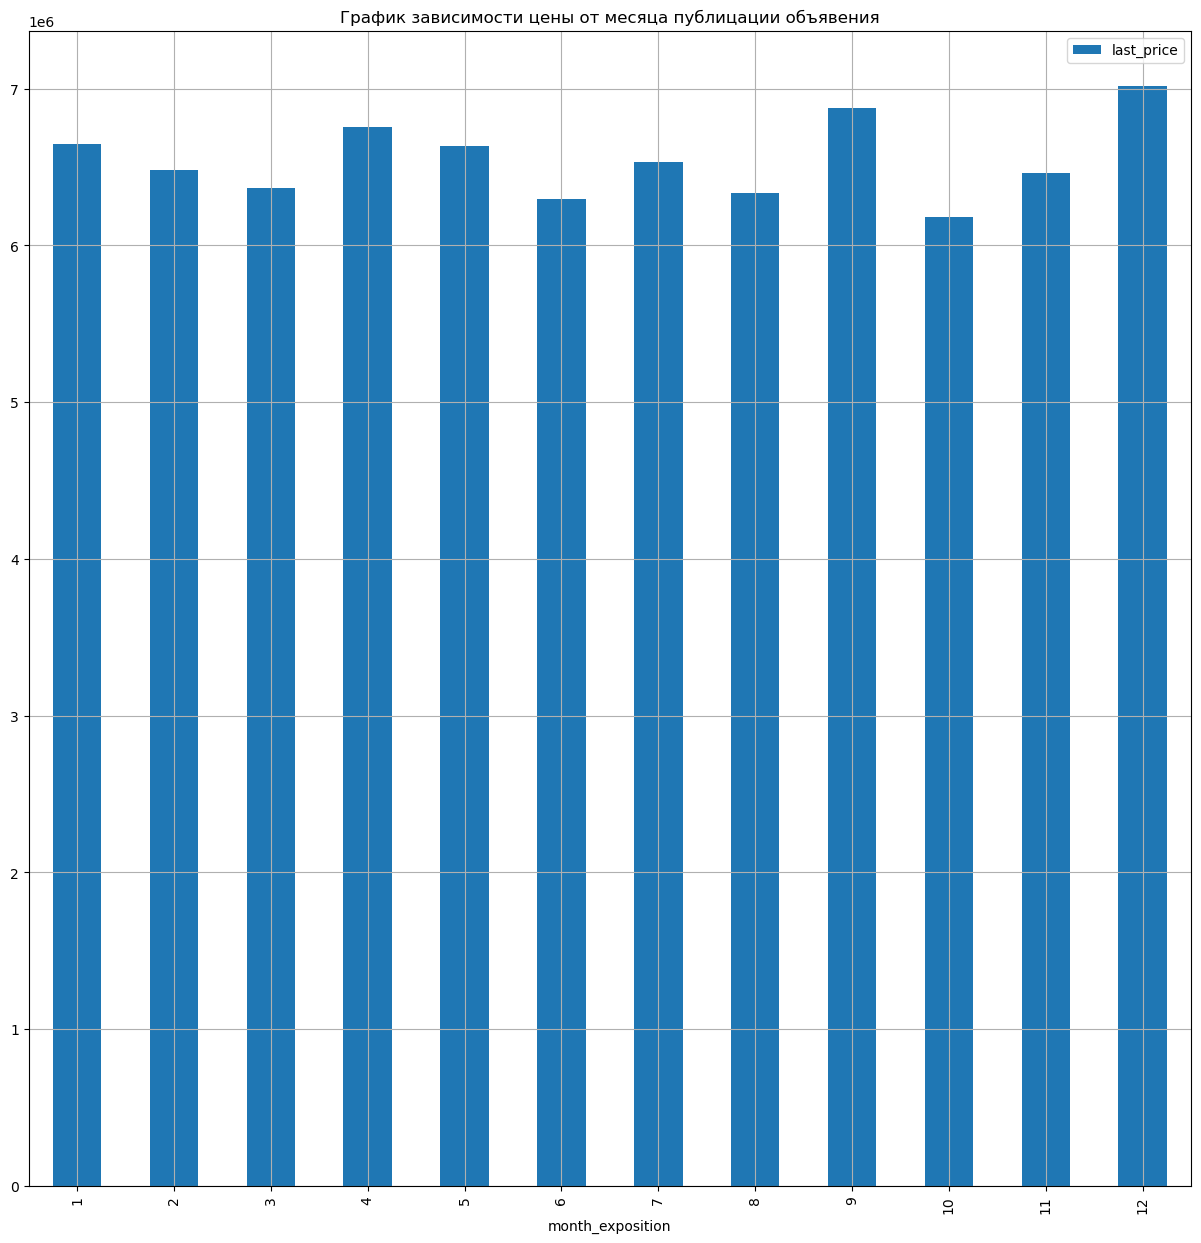

In [69]:
data_estate.pivot_table(index=['month_exposition'], values=['last_price'], aggfunc='mean').plot(grid=True,
    y='last_price', kind='bar', figsize=(15, 15), title='График зависимости цены от месяца публицации объявения')
pass

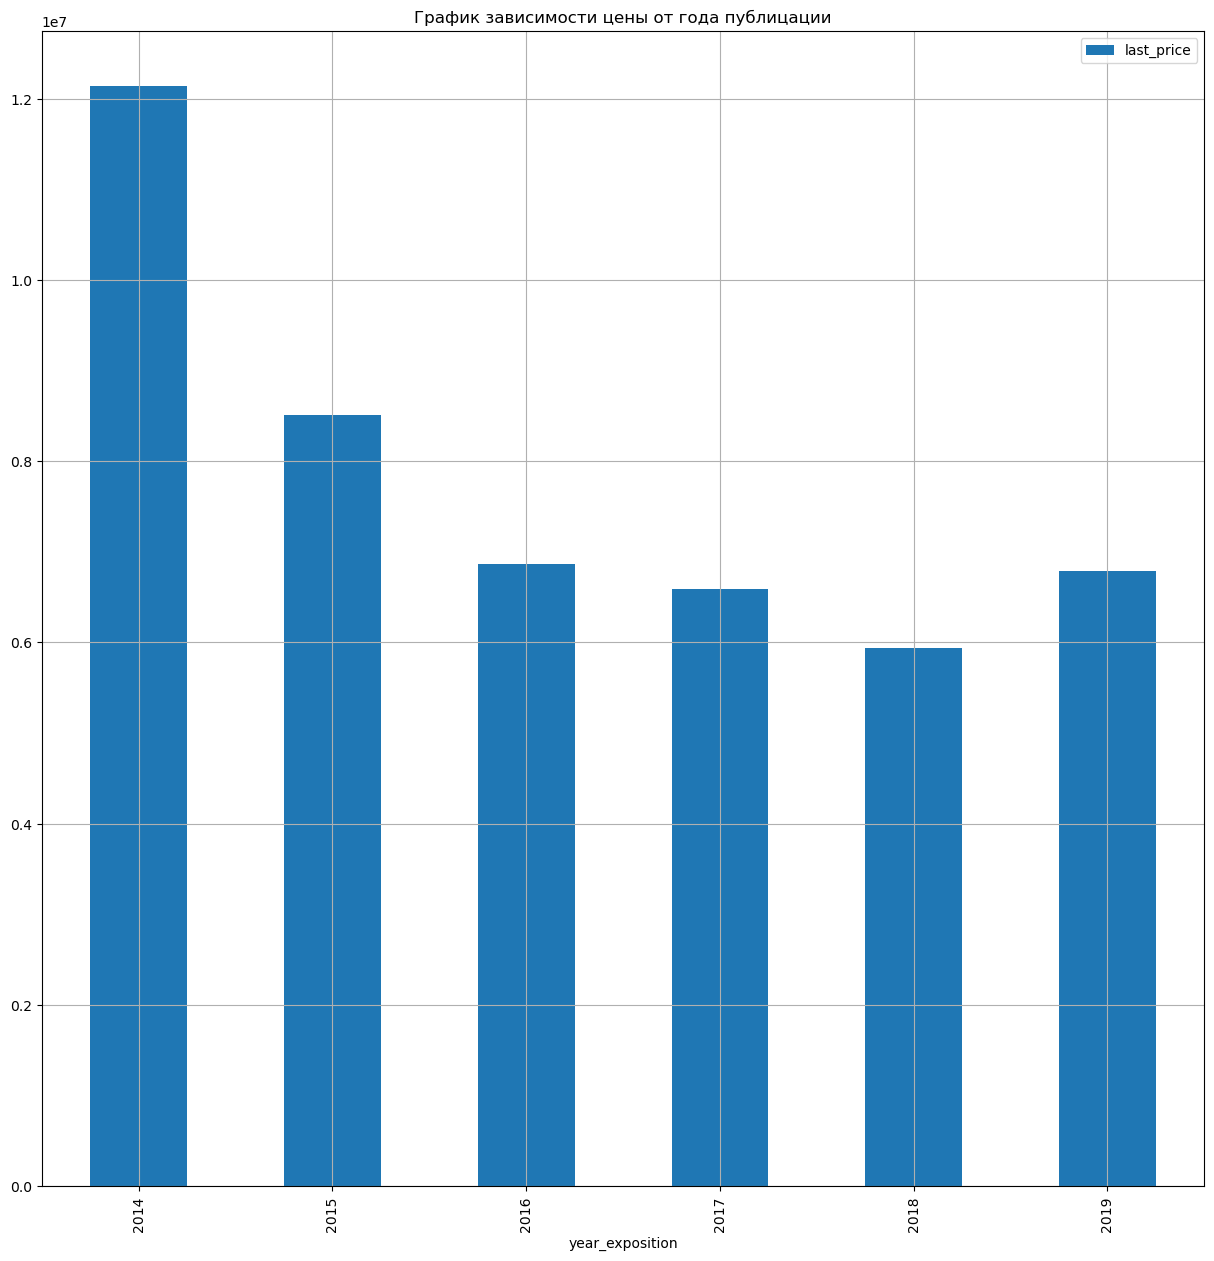

In [70]:
data_estate.pivot_table(index=['year_exposition'], values=['last_price'], aggfunc='mean').plot(grid=True,
    y='last_price', kind='bar', figsize=(15, 15), title='График зависимости цены от года публицации')
pass

По полученным графикам вы видим, что если на диаграммах рассения, мы попытаемя построить прямую, то с увеличением общей, жилой площади или площади кухни, будет расти и значение нашей прямой, следовательно есть зависимость цены от этих параметров. Также, если мы посмотри на график зависимость цены от количества комнат, то увидим, что с увеличением количества комнат, увеличивается и цена недвижимости.

Самый интересный, это последний график, с 2014 года цены на недвижимость падали, это связано с тем, что в 2014 произошел кризис, в этом году на Россию начали активно накладывать санкции, произошла девальвация рубля и был отток капитала из страны, также люди из-за кризиса в стране стали беднее, меньше стал спрос на недвижимость, что повлияло на падение цен на недвижимость. Здесь может прийти к выводу, что после кризисного года цены на недвижимость будут падать, потом после отхода от кризиса, цены на недвижимость вновь будут расти.

Для проверки наших предположений, посмотри корреляции по различным столбцам в зависимости от цены квартиры. Для этого будем рассчитывать коэффициента Пирсона, чем ближе этот коэффициент к 1 или -1, тем теснее линейная взаимосвязь. Для того чтобы рассчитать коэффициент Пирсона для столбца `floor_type` добавим новый столбец `floor_type_num` и укажим следующие числовые значения для типа этажа:
- 1 - первый этаж;
- 2 - другой этаж;
- 3 - последний этаж.

In [71]:
data_estate['floor_type_num'] = data_estate['floor_type']
data_estate['floor_type_num'] = data_estate['floor_type_num'].str.replace('первый', '1')
data_estate['floor_type_num'] = data_estate['floor_type_num'].str.replace('другой', '2')
data_estate['floor_type_num'] = data_estate['floor_type_num'].str.replace('последний', '3')
data_estate['floor_type_num'] = data_estate['floor_type_num'].astype('int')

print('Коэффициент Пирсона по столбцу total_area:', data_estate['last_price'].corr(data_estate['total_area']))
print('Коэффициент Пирсона по столбцу living_area:', data_estate['last_price'].corr(data_estate['living_area']))
print('Коэффициент Пирсона по столбцу kitchen_area:', data_estate['last_price'].corr(data_estate['kitchen_area']))
print('Коэффициент Пирсона по столбцу rooms:', data_estate['last_price'].corr(data_estate['rooms']))
print('Коэффициент Пирсона по столбцу floor_type_num:', data_estate['last_price'].corr(data_estate['floor_type_num']))
print('Коэффициент Пирсона по столбцу weekday_exposition:', data_estate['last_price'].corr(data_estate['weekday_exposition']))
print('Коэффициент Пирсона по столбцу month_exposition:', data_estate['last_price'].corr(data_estate['month_exposition']))
print('Коэффициент Пирсона по столбцу year_exposition:', data_estate['last_price'].corr(data_estate['year_exposition']))

Коэффициент Пирсона по столбцу total_area: 0.6513626595636363
Коэффициент Пирсона по столбцу living_area: 0.5540294592030515
Коэффициент Пирсона по столбцу kitchen_area: 0.4543042975102582
Коэффициент Пирсона по столбцу rooms: 0.3631403993131674
Коэффициент Пирсона по столбцу floor_type_num: 0.055625484883802624
Коэффициент Пирсона по столбцу weekday_exposition: 0.0018762253313239937
Коэффициент Пирсона по столбцу month_exposition: 0.0023482251004846313
Коэффициент Пирсона по столбцу year_exposition: -0.04310678878856925


Как видно по корреляциям у рассмотренных столбцов, самая сильная зависимость цены от общей площади, также есть завимость цены от жилой площади, но она слабее. Ранее мы предположили, что у цены также есть зависимость от площади кухни и количества комнат, однако по корреляциям видно что это не так - корреляции по этим столбцам стремятся к нулю.

По остальным столбцам у нас корреляции почти что равны нулю, что говорит о том, что тип этажа, а также день недели, месяц и год размещения не влияют на цену квартиры.

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлением.

In [72]:
data_estate_square_price = data_estate.pivot_table(index=['locality_name'], values=['square_meter_price'], aggfunc=['mean', 'count'])
data_estate_square_price.columns = ['square_meter_price_mean', 'count']
data_estate_square_price = data_estate_square_price.sort_values(by='count', ascending=False).head(10)
data_estate_square_price.sort_values(by='square_meter_price_mean', ascending=False)

,square_meter_price_mean,count
locality_name,,
Санкт-Петербург,114681.627811,15522
Пушкин,103180.403394,368
деревня Кудрово,92178.829709,283
поселок Парголово,90119.387250,322
поселок Мурино,85272.490966,537
поселок Шушары,78484.151287,437
Колпино,75480.547446,337
Гатчина,68625.141404,303
Всеволожск,68552.215572,392


По полученным расчетам видно, что из топа 10 по количеству объявлений самый дорогой квадратный метр в Санкт-Петебурге, самый дешевый в Выборге. Вызывает удивление, что есть деревни и поселки у которых цена квадратного метра больше, чем в города из конца списка, видимо эти населенные пункты находятся недалеко от Санкт-Петербурга.

Нам известно, что в Санкт-Петербуге самый дорогой квадратный метр, рассчитаем теперь стоимость километра до центра города от недвижимости, а также среднюю стоимость по каждому километру. Построим две столбчатых диаграммы, средняя цена каждого километра и диаграмму зависимости средней стоимости километра от средней цены квартиры при различном удалении от центра города.

In [73]:
data_estate['price_kilometer'] = data_estate.loc[data_estate['locality_name'] == 'Санкт-Петербург']['last_price'] / data_estate.loc[data_estate['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest_kilometer']
data_price_kilometer = data_estate.pivot_table(index=['cityCenters_nearest_kilometer'], values=['last_price', 'price_kilometer'], aggfunc=['mean'])
data_price_kilometer.columns = ['mean_last_price_kilometer', 'mean_price_kilometer']
data_price_kilometer['mean_price_kilometer'] = data_price_kilometer['mean_price_kilometer'].round(0)

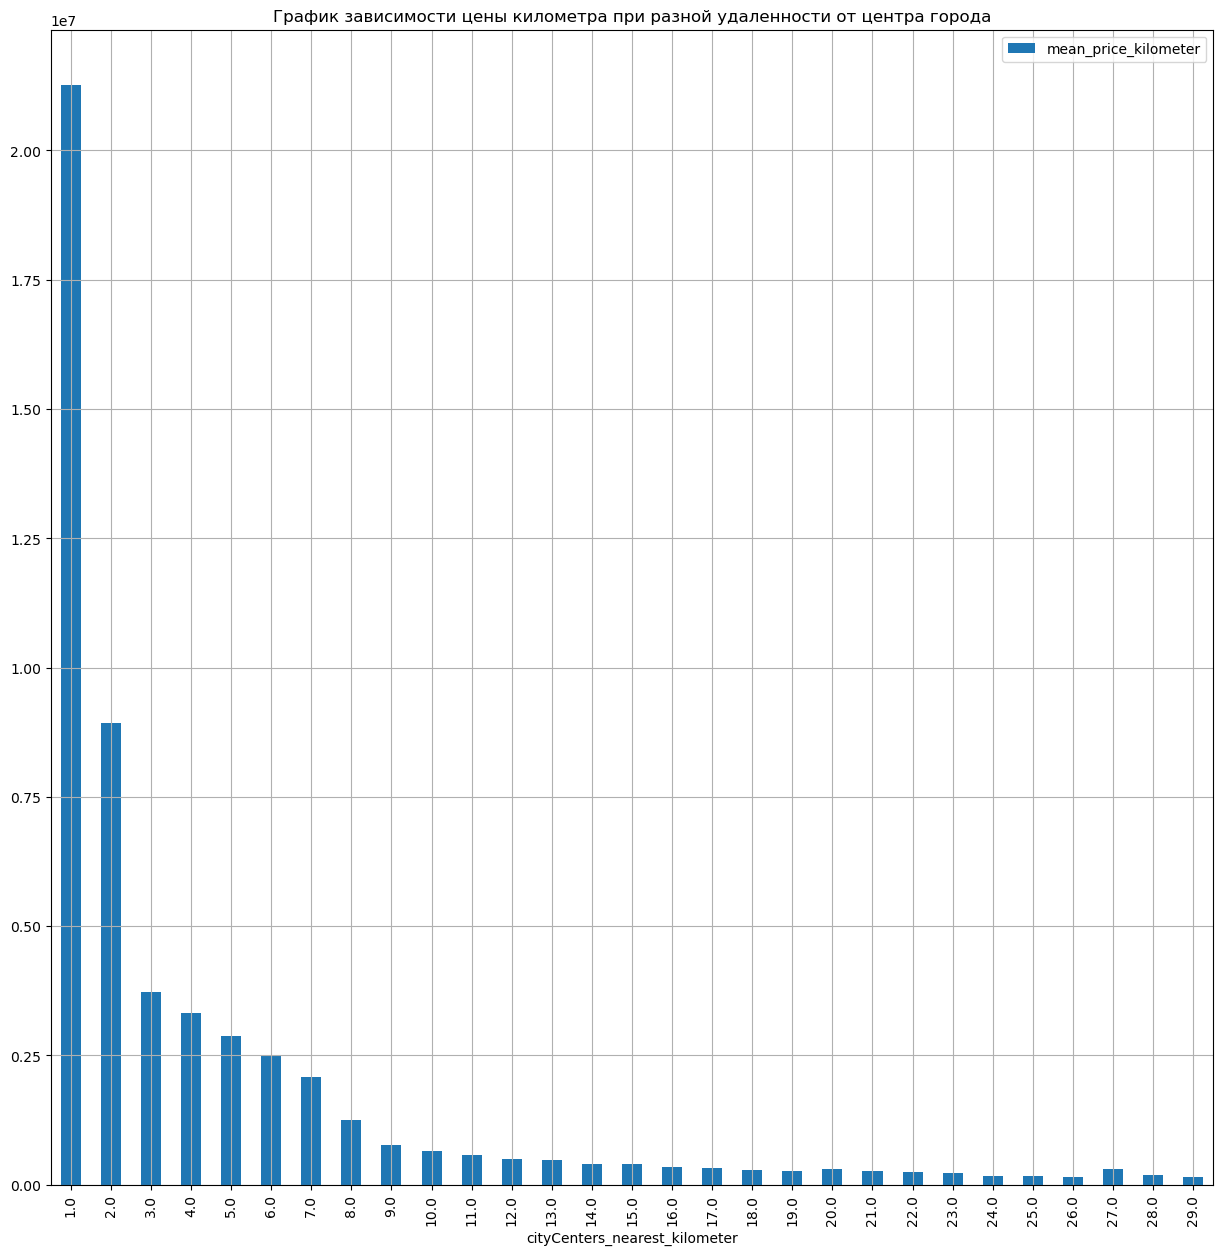

In [74]:
data_price_kilometer[~(data_price_kilometer['mean_price_kilometer'].isna())].plot(
    grid=True, y='mean_price_kilometer', kind='bar', figsize=(15, 15), 
    title='График зависимости цены километра при разной удаленности от центра города')
pass

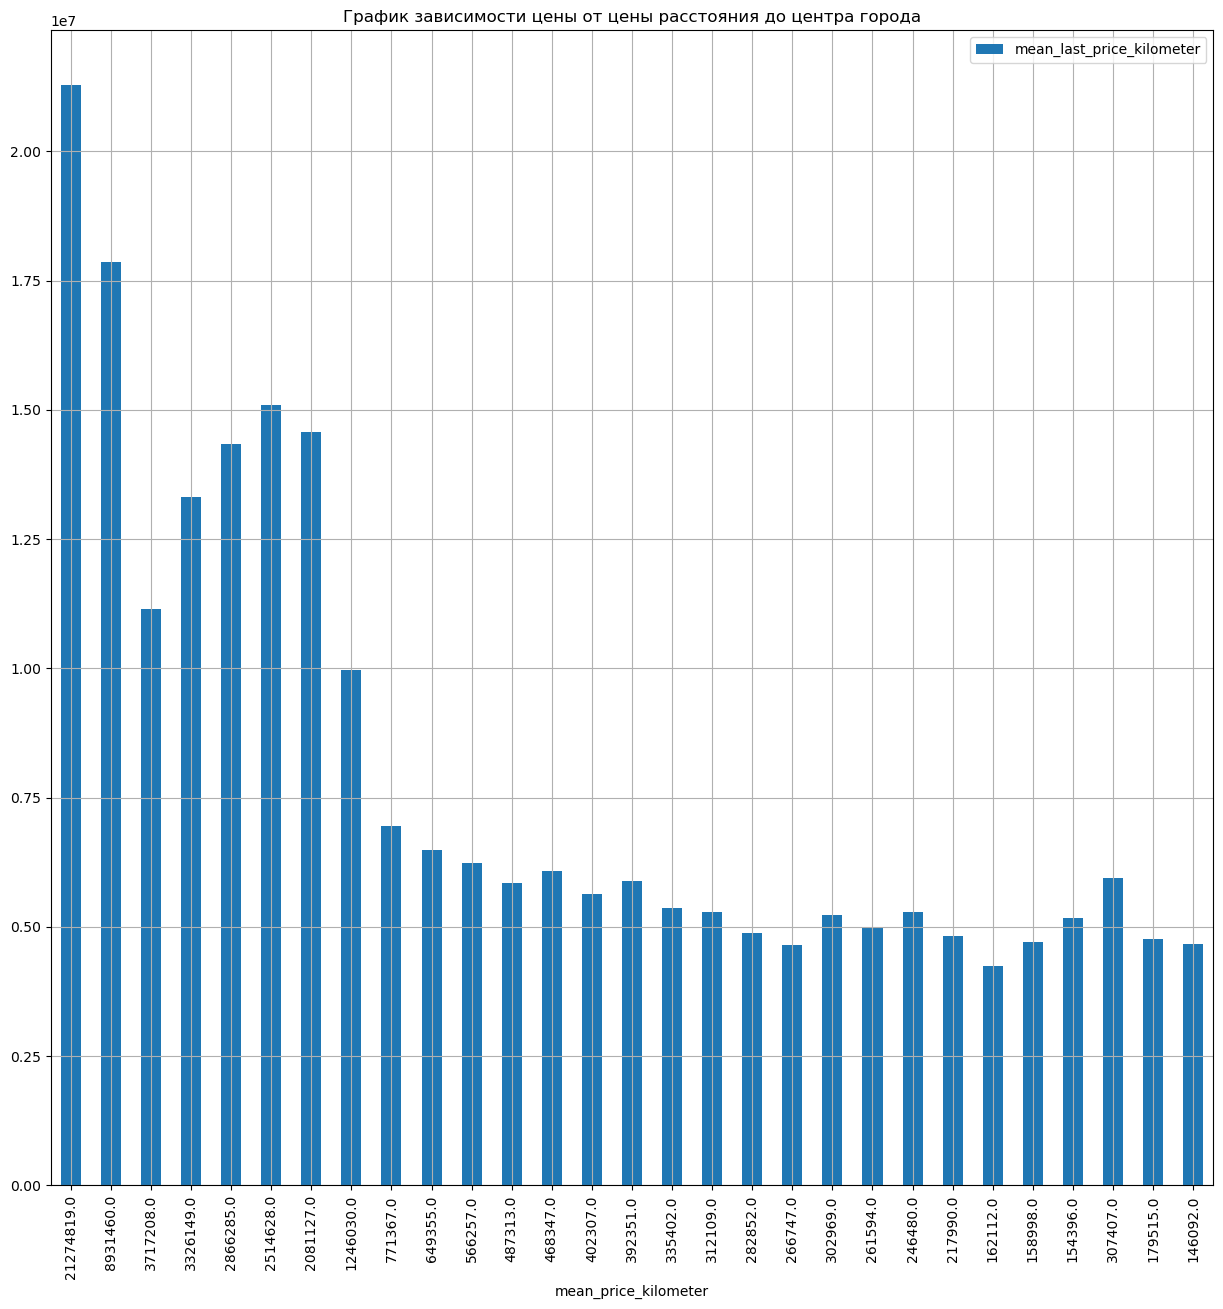

In [75]:
data_price_kilometer[~(data_price_kilometer['mean_price_kilometer'].isna())].plot(
    grid=True, x='mean_price_kilometer', y='mean_last_price_kilometer', kind='bar', figsize=(15, 15), 
    title='График зависимости цены от цены расстояния до центра города')
pass

Как видно по двум графикам, чем дальше недвижимость находится от центра города, чем дешевле будет стоить километр. По второму графику заметно, что чем меньше средняя цена километра, чем меньше цена на недвижимость. По графикам можно сделать вывод, что имеется линейная зависимость цены квартиры от цены километра до центра города, что в принципе логично, так как мы это значение рассчитывали с помощью цены квартиры.

### Общий вывод

С помощью проведенного исследования, мы нашли интересные зависимости в данных в объявлениях о продаже квартиры, с помощью графиков мы предположили, что цена квартиры зависит от следующих параметров -  общая площадь, жилая площадь, площадь кухни количество комнат, однако с помощью корреляций мы выяснили, что цена квартиры зависит только от двух параметров общая площадь и жилая площадь. На график было заметно, что был спад цен на квартиры после 2014 года, однако по корреляциям удалось выяснить, что между годом публикации объявлении и ценой квартиры нет зависимости.

С помощью введения дополнительных параметров, нам удалось вычислить населенный пункт с самым дорогим квадратным метром, а также определить зависимость между расстоянией до центра города и ценой квартиры. 

Также, с помощью квартилей, мы смогли определить, что квартиры, которые продались меньше чем за 45 дней это подозрительные быстрые продажи, а квартиры, которые продавались больше, чем 512 дней - это слишком медленные продажи. Полученные данные помогут определять мошеническую деятельность с недвижимостью, например, если квартиру, которую продали меньше чем за 45 дней снова выставят на продажу, то это будет подозрительно, особенно если так повторно выставят на продажу несколько раз, у такой квартиры явно будут какие-то проблемы с документами. По медленным продажи можно определить не востребованные варианты на рынке недвижимость, например, старый ремонт и завышенная цена или неблагополучный район и завышенная цена.

Нашей главное задачей было определить параметры по которым можно будет определить рыночную стоимость квартиры, резюмирую, все выше перечисленное, можно выбрать следующие параметры:

- total_area — общая площадь квартиры в квадратных метрах (м²);
- living_area — жилая площадь в квадратных метрах (м²);

Также сюда можно добавить следующие параметры, которые мы добавили сами во время анализа данных, так как их рассчитывали с помощью предоставленной цены на недвижимость:

- цена одного квадратного метра;
- средняя цена каждого километра от центра города.

Остальные параметры не подойдут для определения рыночной стоимости квартиры как мы проверяли по корреляциям, но эти параметры можно использовать и для других целей.